**Exploratory Data Analysis on a Dataset**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [25]:
dataset = pd.read_csv('/content/Cardiotocographic.csv')

In [26]:
# Assign the dataset to the variable df
df = dataset  # Assuming you intend 'df' to refer to the dataset

In [27]:
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [28]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset (data types, non-null values, etc.)
print(df.info())

# Generate descriptive statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())



           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-n

 1.Data Cleaning and Preparation:

In [29]:
# Check for missing values
if df is not None:
    missing_values = df.isnull().sum()
    print("Missing values per column:\n", missing_values)

    # Handle missing values (example using imputation for numerical features and mode for categorical)
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Numerical columns
            # Impute missing numerical values with the mean
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':  # Categorical columns (if any)
            # Impute missing categorical values with the mode
            df[col] = df[col].fillna(df[col].mode()[0])

    # Verify if missing values are handled
    missing_values_after = df.isnull().sum()
    print("\nMissing values after imputation:\n", missing_values_after)
else:
    print("DataFrame is None. Cannot handle missing values.")

Missing values per column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Missing values after imputation:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [30]:
# Identify and correct inconsistent data types
if df is not None:
    for col in df.columns:
        # Check if the column has numerical values stored as strings
        if pd.api.types.is_string_dtype(df[col]):
            try:
                # Attempt to convert the column to numeric
                df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' converts invalid parsing to NaN

                # Handle NaN values resulting from conversion (e.g., imputation)
                if df[col].isnull().any():
                    df[col] = df[col].fillna(df[col].mean()) # Impute with the mean (adjust as needed)

            except (ValueError, TypeError):
                print(f"Column '{col}' could not be converted to numeric. It may contain non-numeric values or formatting issues.")
                # Handle the error, e.g., leave the column as is or remove it.
                # Example: If the column is not crucial, you could remove it:
                # df.drop(columns=[col], inplace=True)
        elif pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_integer_dtype(df[col]):
            # Check for numerical columns that might have decimal values but are incorrectly represented as integers.
            # Handle these cases as needed, such as converting them to float
            if not df[col].apply(lambda x: isinstance(x, (int, float, complex))).all():
              try:
                  df[col] = df[col].astype(float)
              except ValueError as e:
                  print(f"Error converting {col} to float: {e}")


    # Print data types after conversion
    print("\nData types after conversion:\n", df.dtypes)
else:
    print("DataFrame is None. Cannot check data types.")


Data types after conversion:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


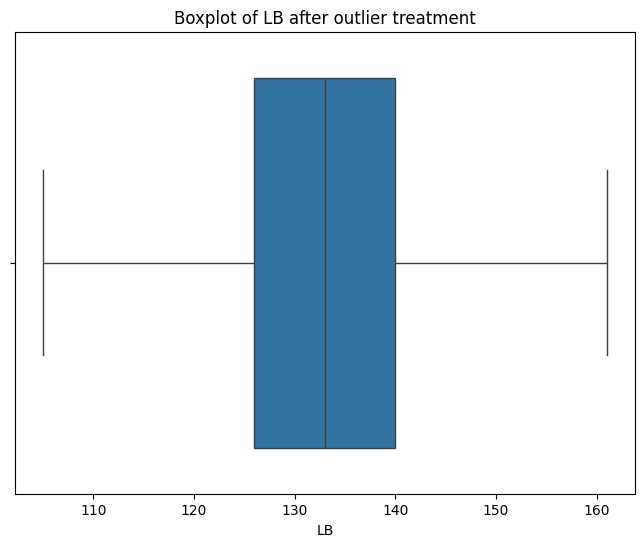

Column: LB
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 10


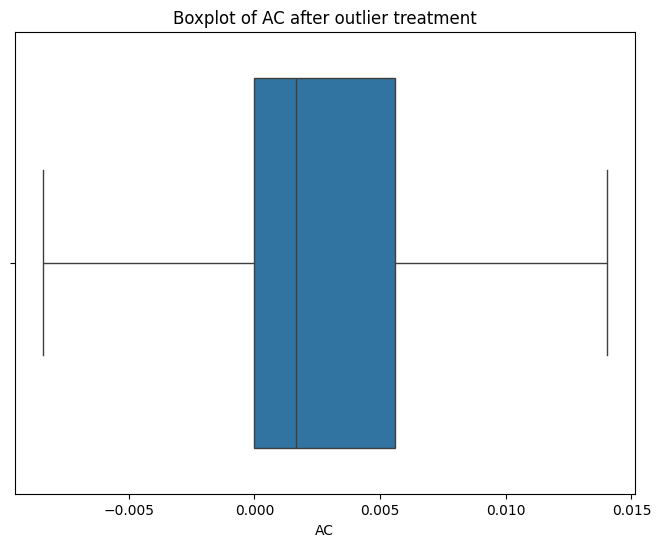

Column: AC
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 18


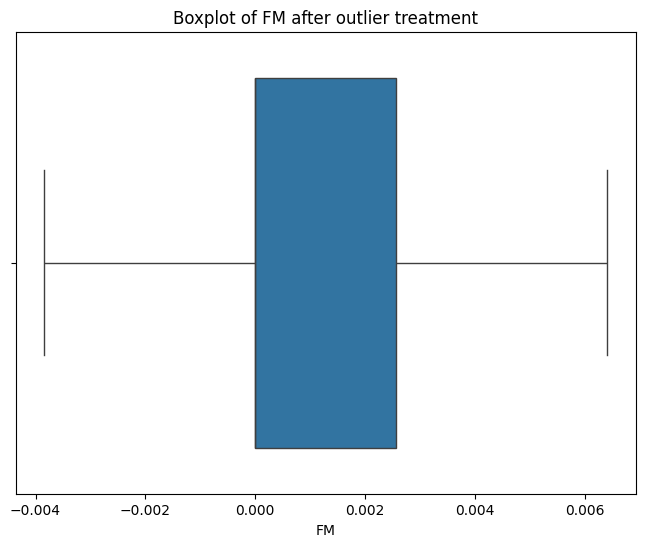

Column: FM
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 39


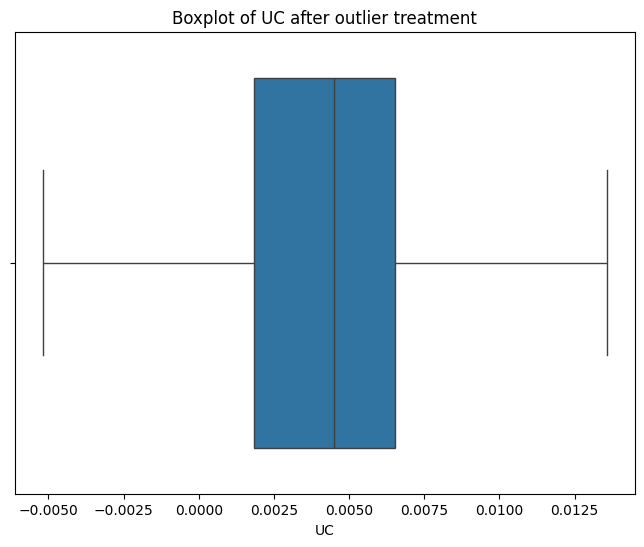

Column: UC
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 11


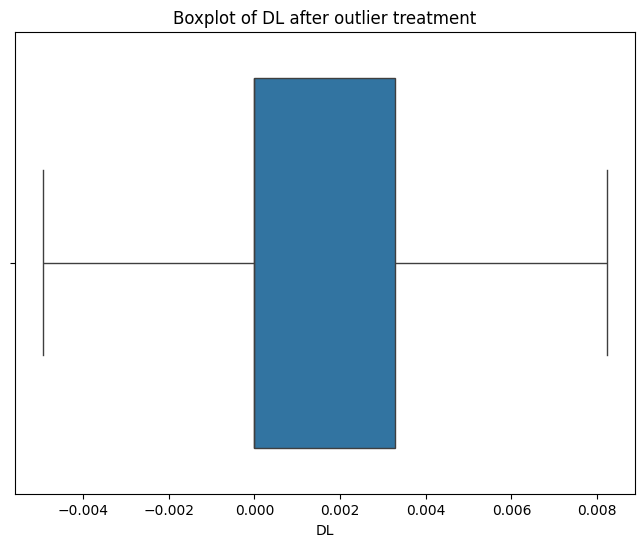

Column: DL
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 33


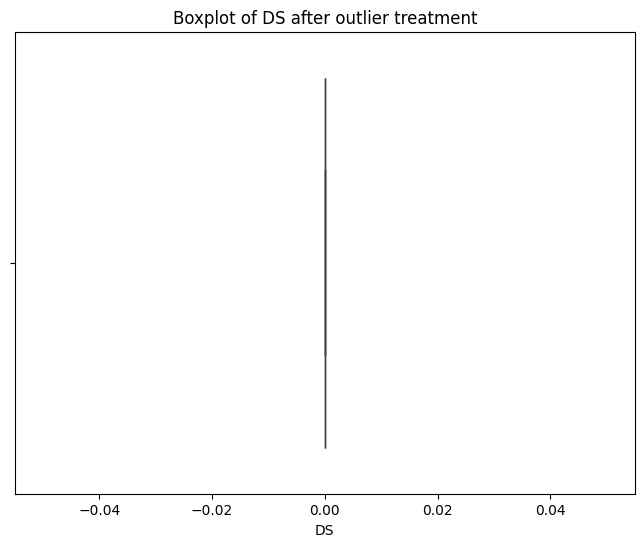

Column: DS
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 16


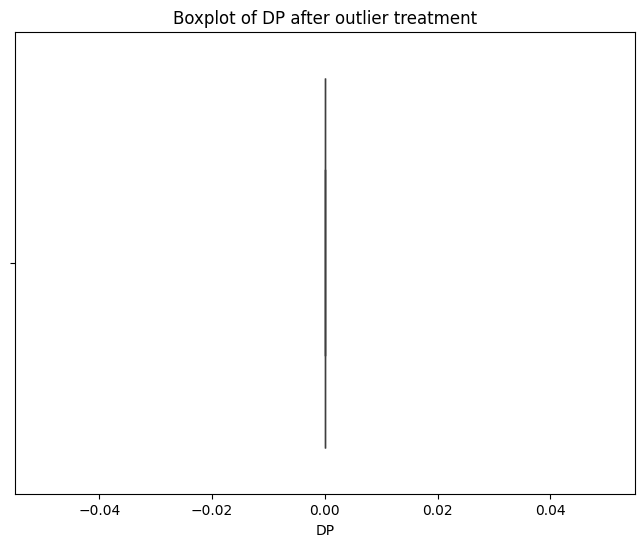

Column: DP
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 39


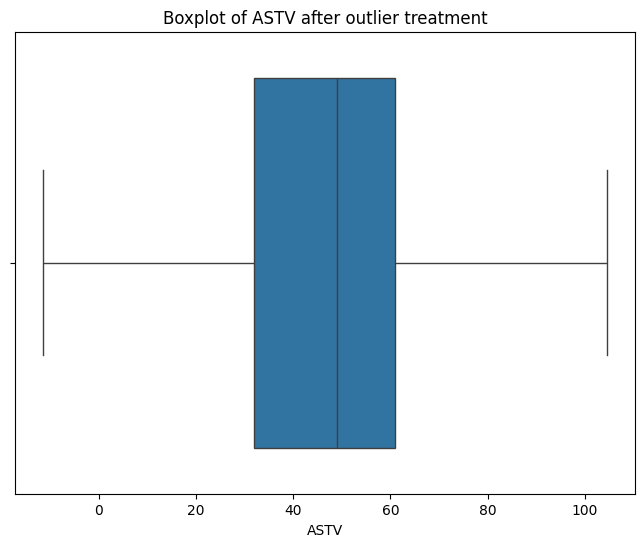

Column: ASTV
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 10


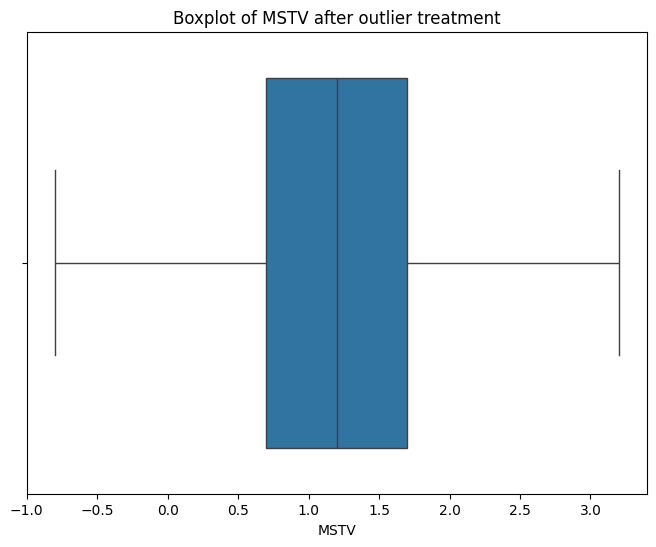

Column: MSTV
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 26


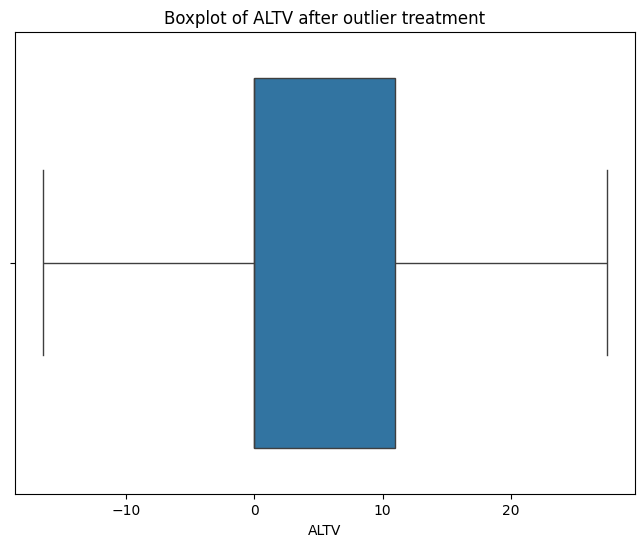

Column: ALTV
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 38


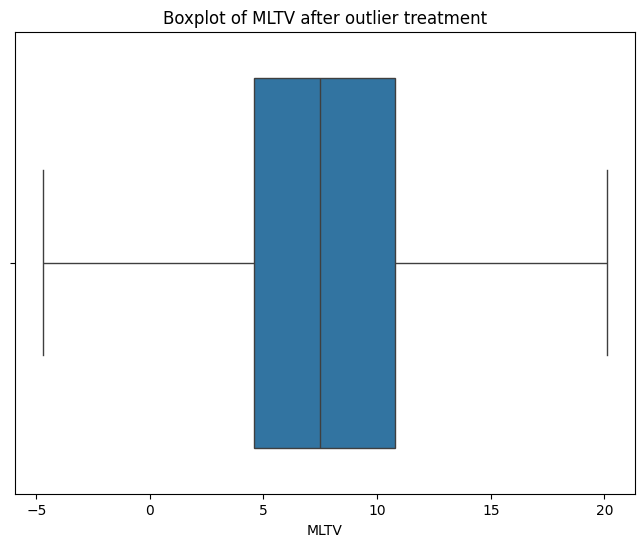

Column: MLTV
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 17


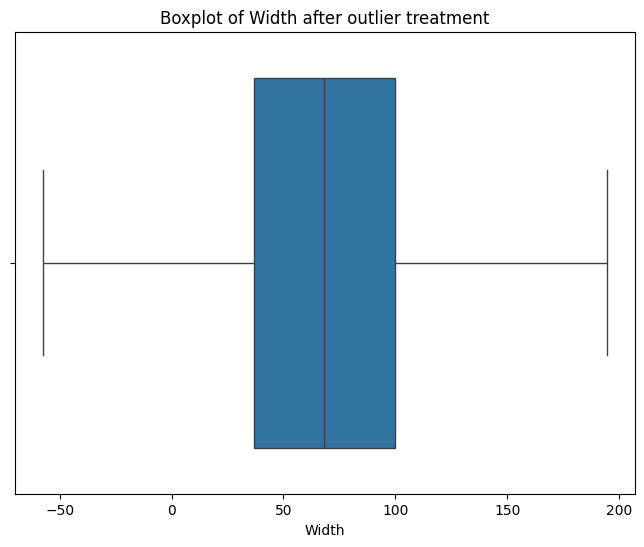

Column: Width
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 10


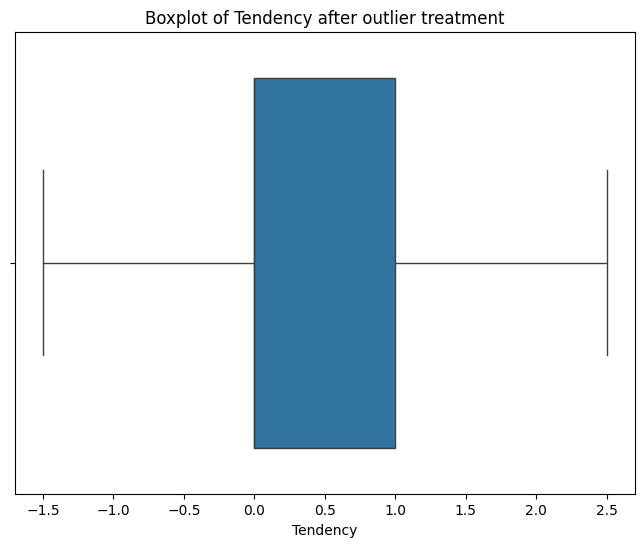

Column: Tendency
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 10


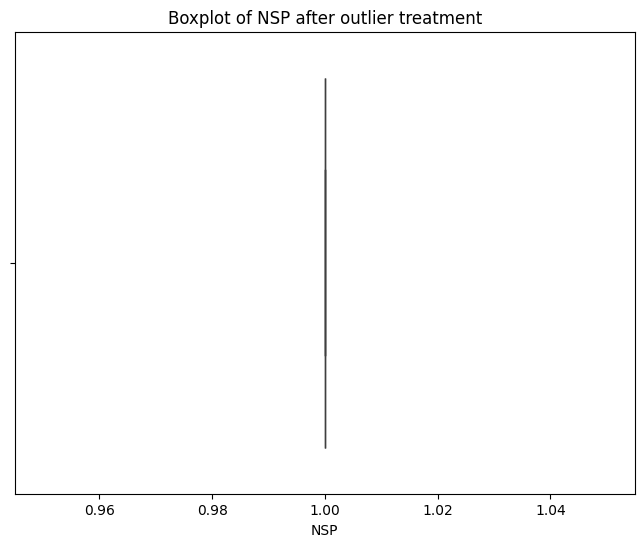

Column: NSP
Number of outliers identified using IQR: 0
Number of outliers identified using Z-score: 10


In [31]:
# Outlier Detection and Treatment
if df is not None:
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            # Method 1: IQR method
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Method 2: Z-score method (less robust to skewed distributions)
            z = np.abs(stats.zscore(df[col]))
            outliers_zscore = np.where(z > 3)  # Identify outliers with a Z-score > 3

            # Choose one method for outlier handling
            # Option 1: Remove Outliers
            # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


            # Option 2: Cap Outliers
            df[col] = np.clip(df[col], lower_bound, upper_bound)

            # Option 3: Replace with mean/median
            # df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = df[col].median() # Use median for skewed data


            # Visualization (optional)
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot of {col} after outlier treatment')
            plt.show()


            # Print some stats about the outliers (optional)
            print(f"Column: {col}")
            print(f"Number of outliers identified using IQR: {len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])}")

            # Print outliers identified by Z-score
            print(f"Number of outliers identified using Z-score: {len(outliers_zscore[0])}")

else:
    print("DataFrame is None. Cannot perform outlier analysis.")

2.Statistical Summary:

In [32]:
# Statistical Summary
print(df.describe(include='all'))

# Calculate interquartile range (IQR) for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"IQR of {col}: {IQR}")

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.293725     0.003147     0.001568     0.004362     0.001770   
std       9.930227     0.003826     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.016212   
std       0.0     0.0    17.612745     0.781091    10.378400     5.046784   
min       0.0     0.0   -

In [33]:
# Example: Highlight a potentially significant correlation (adjust threshold as needed)
correlation_matrix = df.corr()
print(correlation_matrix)
for col1 in correlation_matrix.columns:
  for col2 in correlation_matrix.columns:
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.7:
        print(f"Important: Strong correlation ({correlation_matrix.loc[col1,col2]}) found between {col1} and {col2}.")


                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.080880 -0.006904 -0.162773 -0.156224 NaN NaN  0.285623   
AC       -0.080880  1.000000  0.076151  0.093970 -0.102722 NaN NaN -0.272436   
FM       -0.006904  0.076151  1.000000 -0.317265 -0.017610 NaN NaN  0.156351   
UC       -0.162773  0.093970 -0.317265  1.000000  0.268605 NaN NaN -0.215984   
DL       -0.156224 -0.102722 -0.017610  0.268605  1.000000 NaN NaN -0.111624   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.285623 -0.272436  0.156351 -0.215984 -0.111624 NaN NaN  1.000000   
MSTV     -0.295485  0.217447  0.070300  0.297843  0.566340 NaN NaN -0.433844   
ALTV      0.322315 -0.409592 -0.013420 -0.293340 -0.295886 NaN NaN  0.439040   
MLTV     -0.042613 -0.152335 -0.036875 -0.074002 -0.242556 NaN NaN -0.324728   
Width    -0.140044  0.283773  0.164648  

In [34]:
# Highlight interesting findings with comments and print statements

# Missing Value Analysis
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

#Example: If there are any missing values, highlight them.
if missing_values.sum() > 0:
    print("Important: Missing values found.  Imputation was performed. Review imputation strategy.")


# Inconsistent Data Types
# Example: Highlight columns that could not be converted to numeric
inconsistent_cols = []
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]):
      try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if df[col].isnull().any():
          df[col] = df[col].fillna(df[col].mean()) # Impute with mean (adjust as needed)
      except (ValueError, TypeError):
        print(f"Column '{col}' could not be converted to numeric. Check for non-numeric values.")
        inconsistent_cols.append(col)

if inconsistent_cols:
  print(f"Important: Columns {inconsistent_cols} could not be converted to numeric.  Further investigation needed.")



Missing values per column:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [35]:
# Outlier Analysis
# Example: Flag columns with a high number of outliers
for col in df.select_dtypes(include=np.number):
    if col != 'NSP':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        num_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        if num_outliers > 0.1 * len(df):  # If more than 10% of the data are outliers in a column
            print(f"Important: Column '{col}' has a high number of outliers ({num_outliers}). Consider alternative outlier treatment.")

        df[col] = np.clip(df[col], lower_bound, upper_bound)


In [36]:
# Statistical Summary and IQR
print(df.describe(include='all'))
numerical_features = df.select_dtypes(include=np.number).columns
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"IQR of {col}: {IQR}")


# Example: Highlight a potentially significant correlation (adjust threshold as needed)
correlation_matrix = df.corr()
print(correlation_matrix)
for col1 in correlation_matrix.columns:
  for col2 in correlation_matrix.columns:
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.7:
        print(f"Important: Strong correlation ({correlation_matrix.loc[col1,col2]}) found between {col1} and {col2}.")

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.293725     0.003147     0.001568     0.004362     0.001770   
std       9.930227     0.003826     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.016212   
std       0.0     0.0    17.612745     0.781091    10.378400     5.046784   
min       0.0     0.0   -

3.Data Visualization:

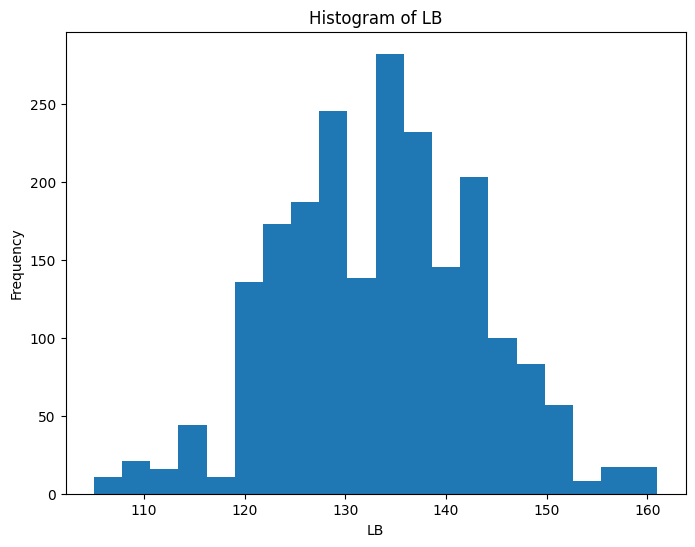

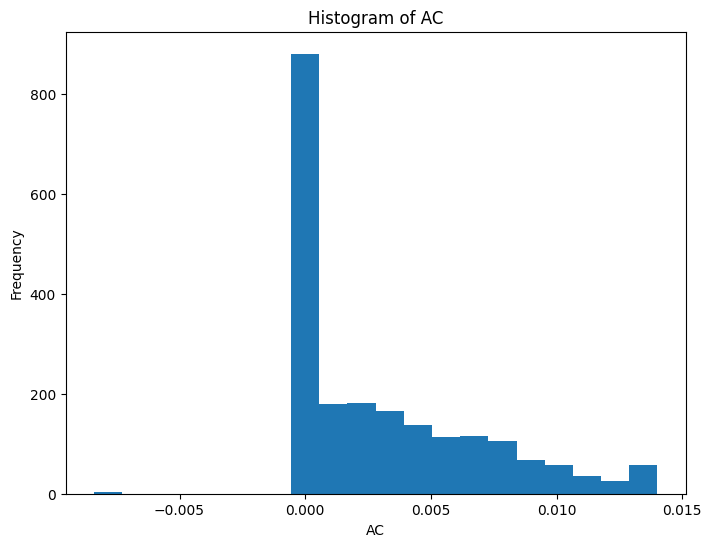

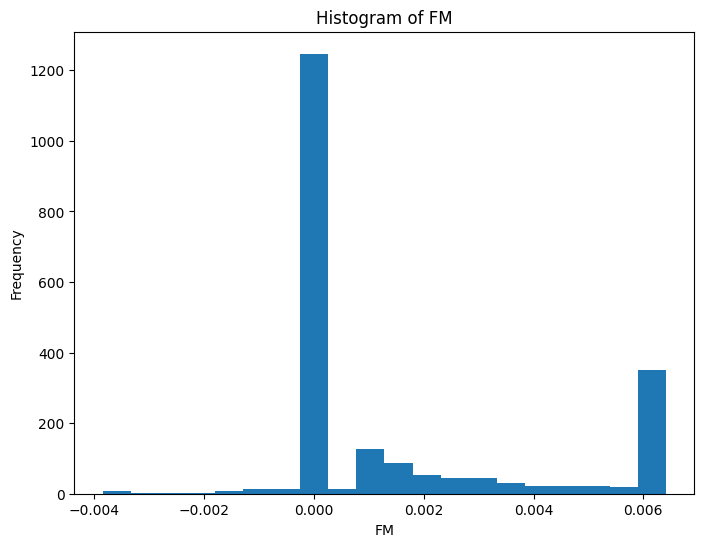

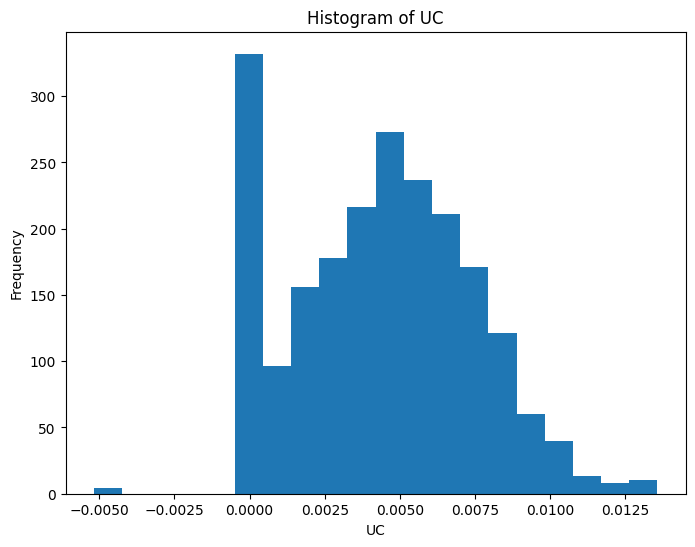

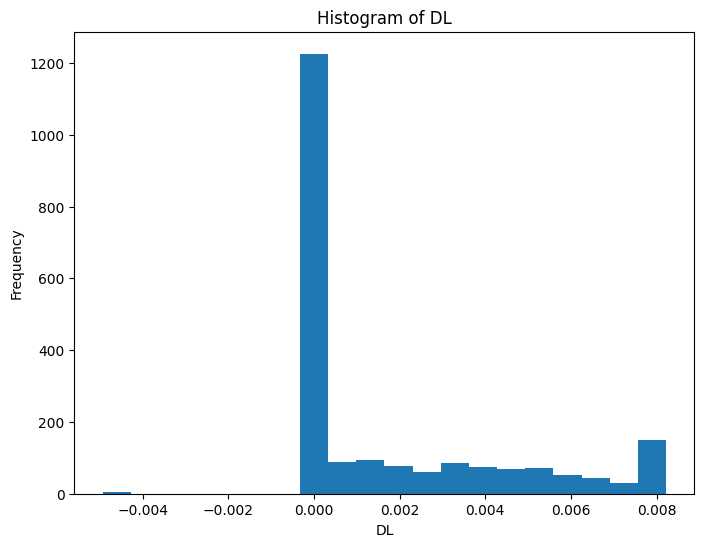

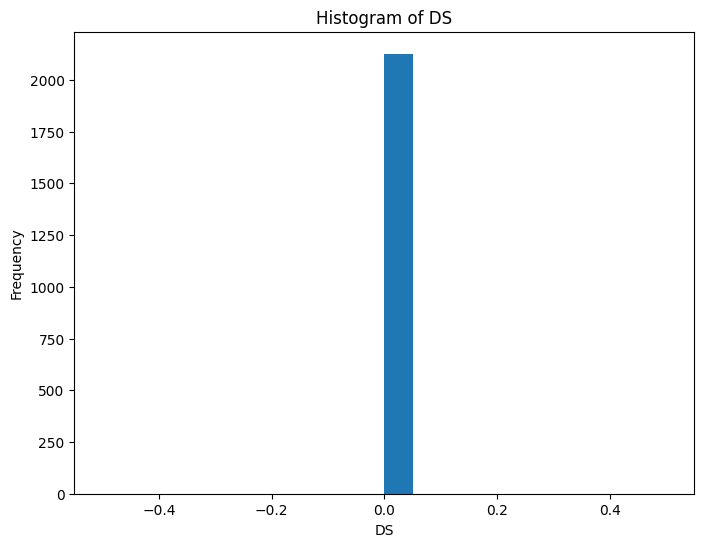

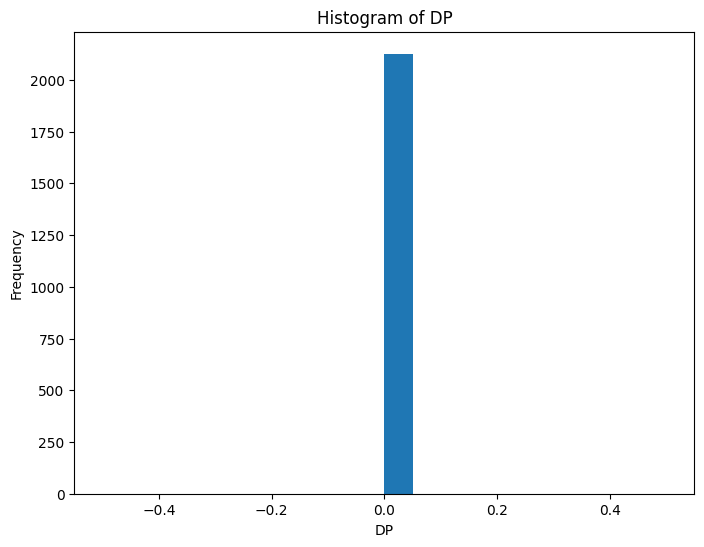

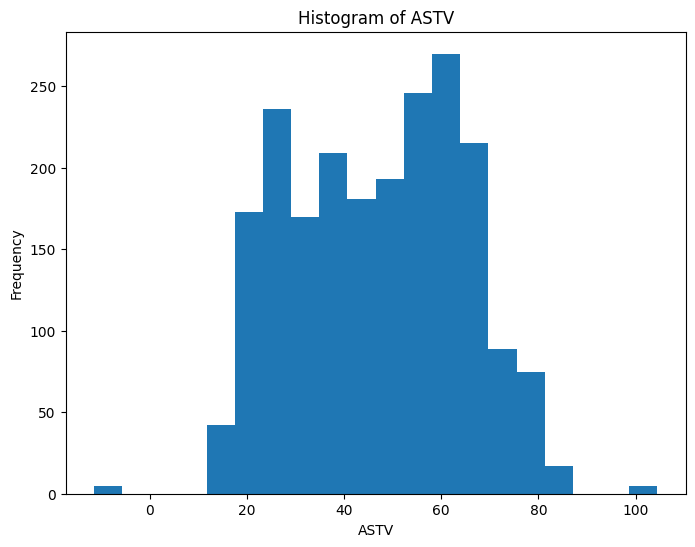

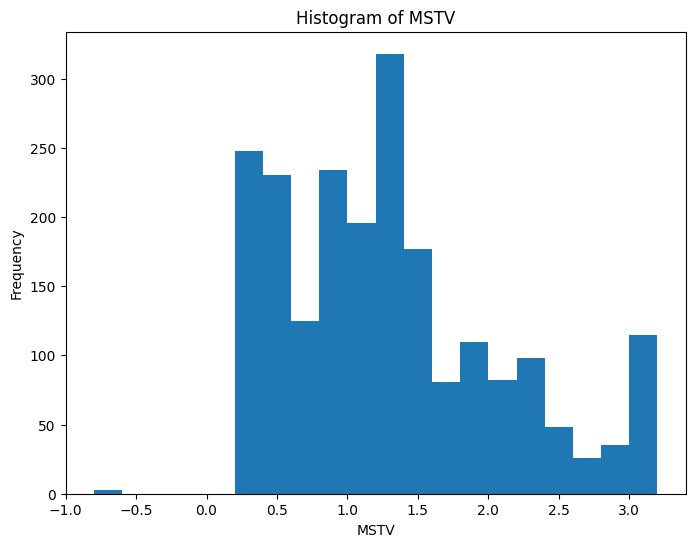

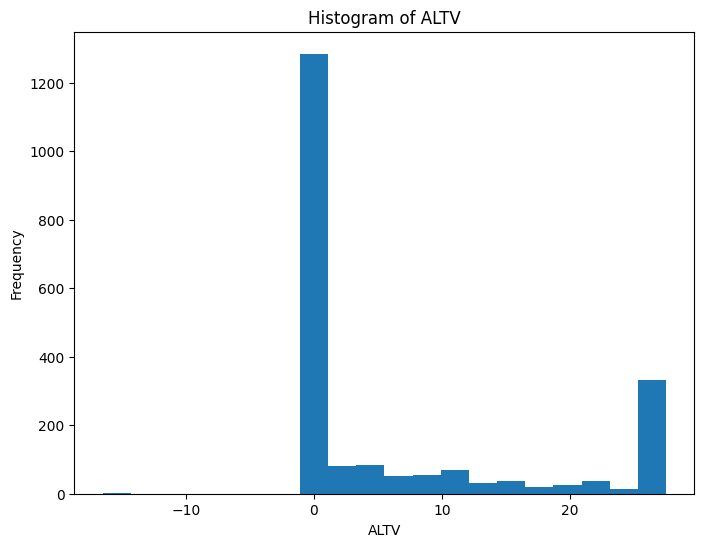

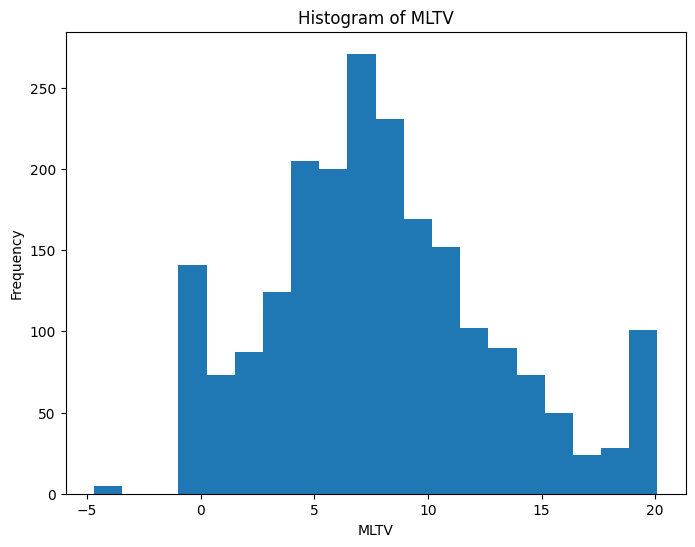

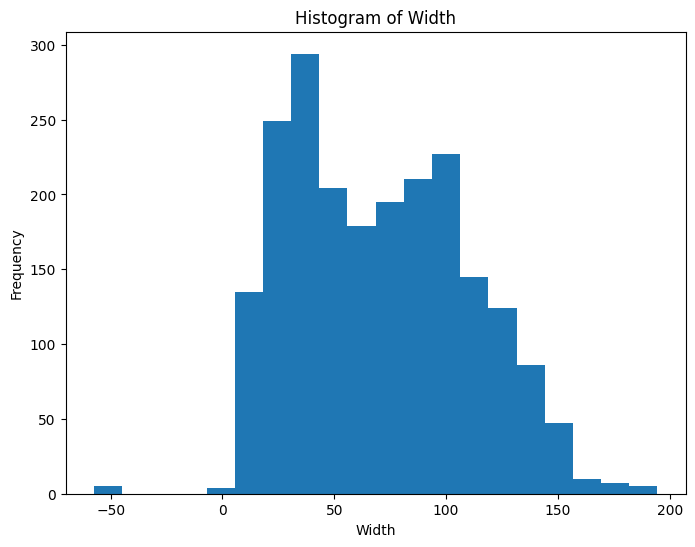

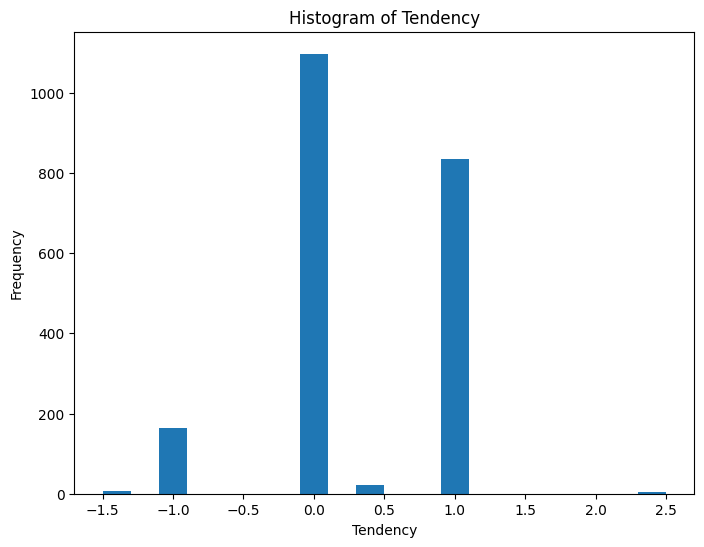

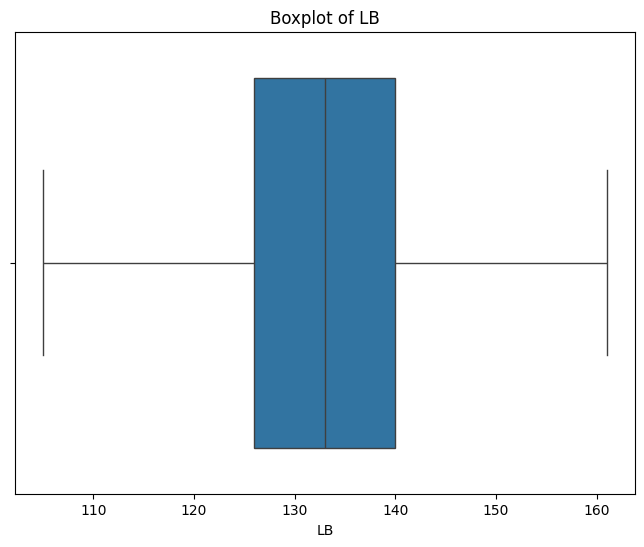

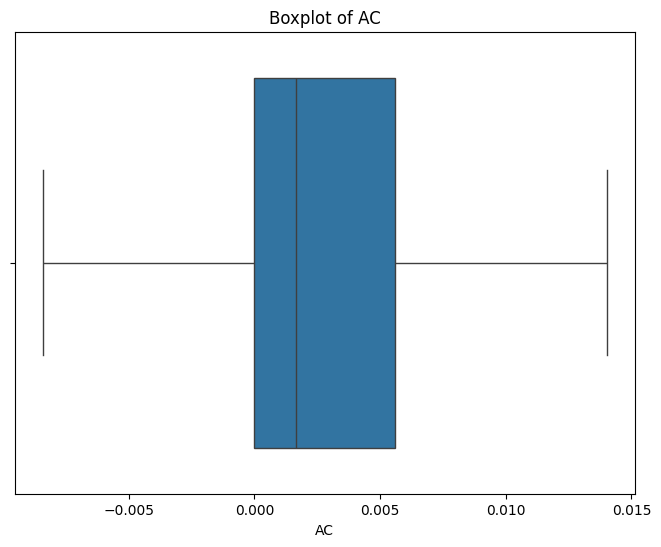

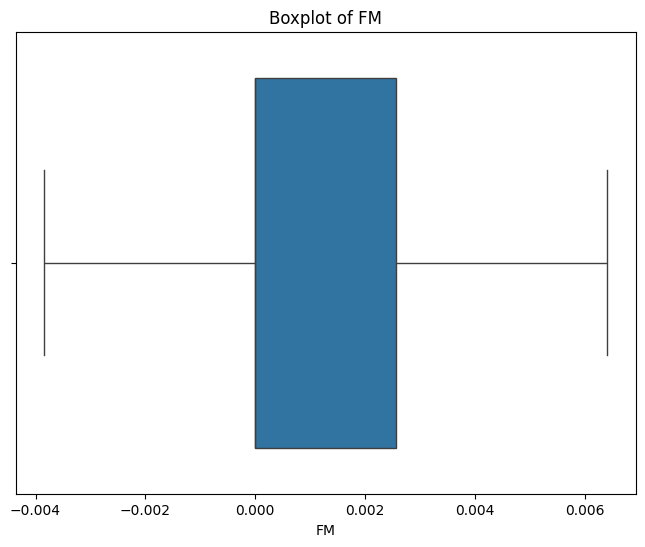

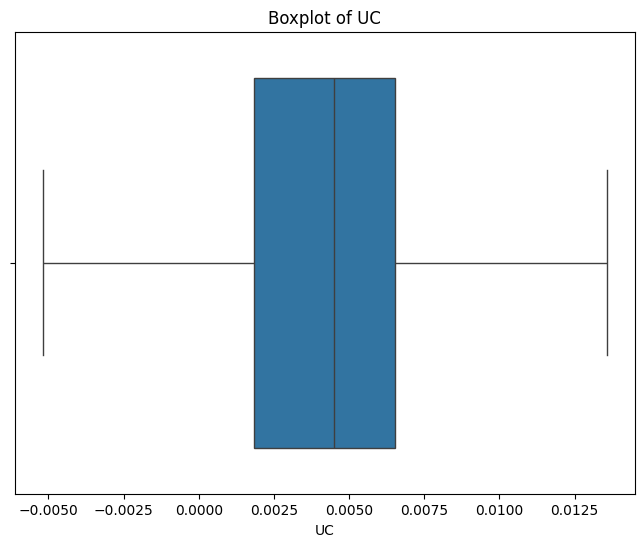

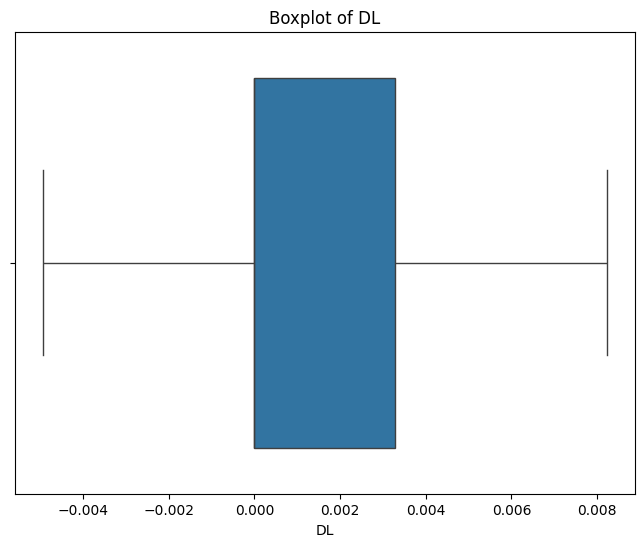

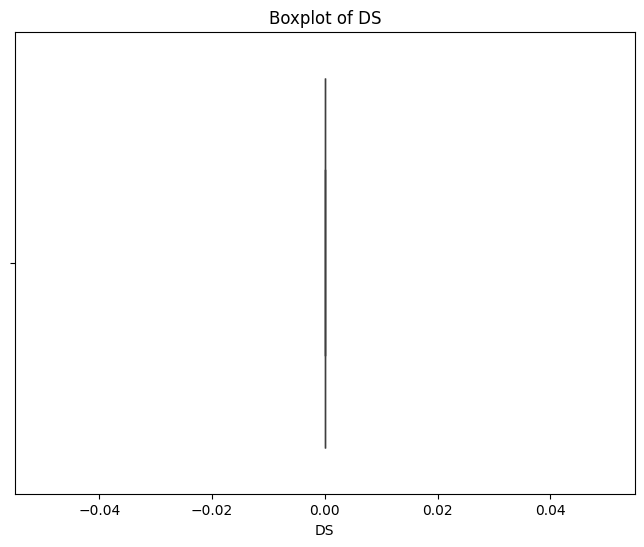

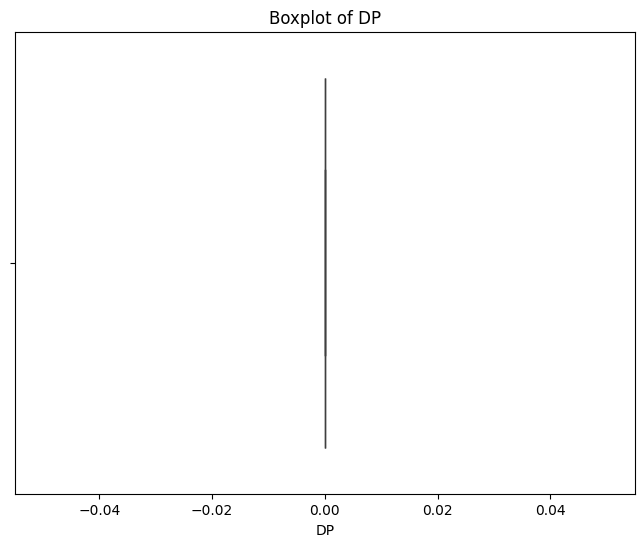

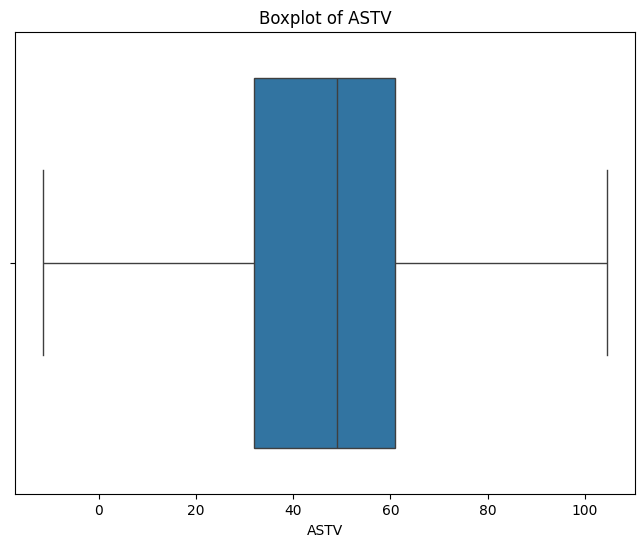

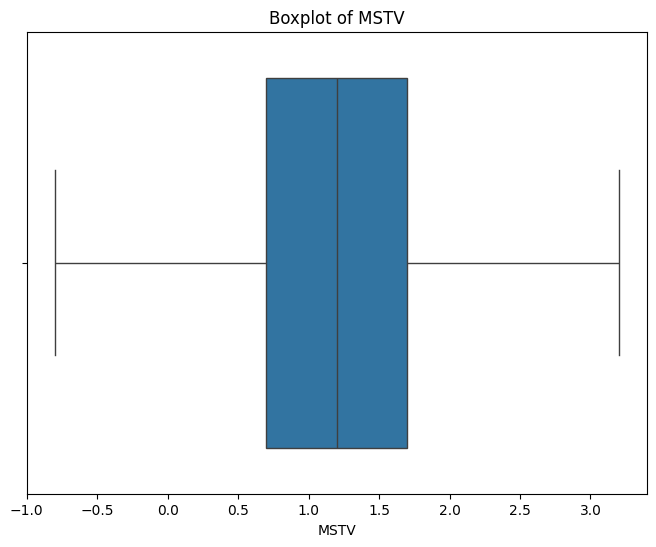

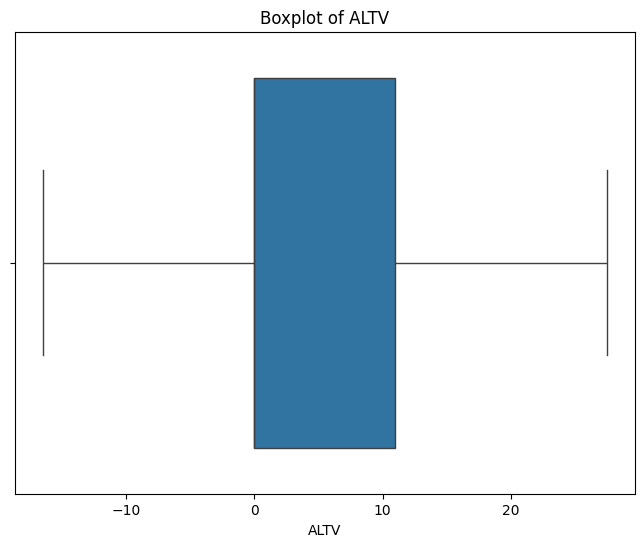

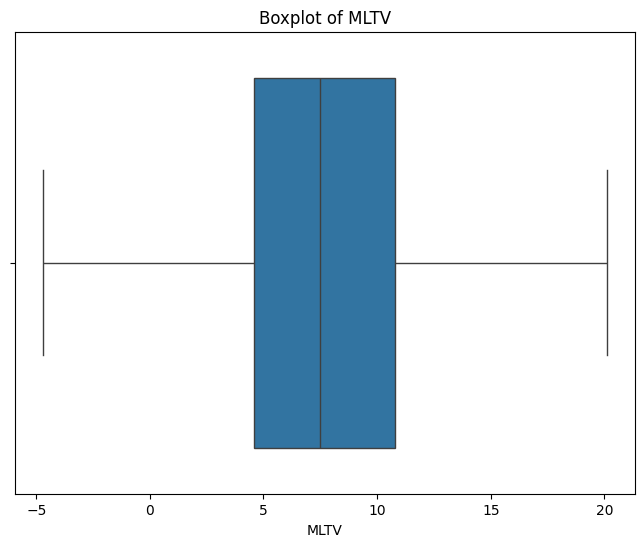

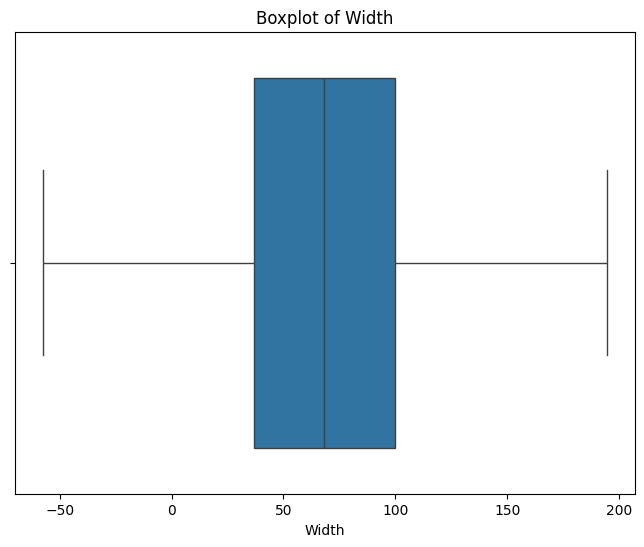

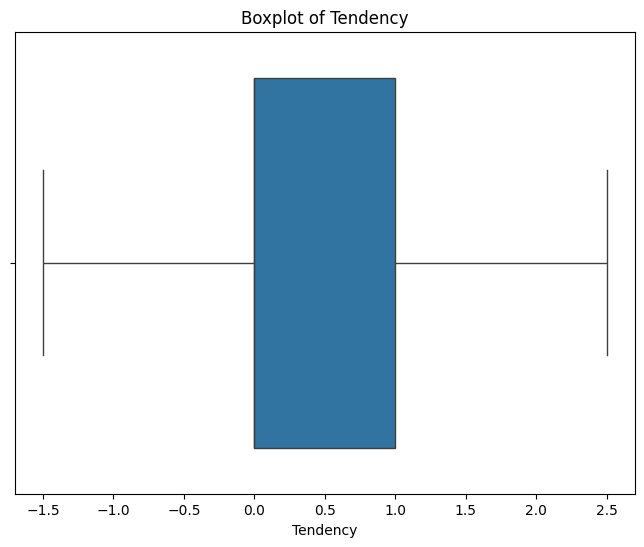

In [37]:
# Create histograms for numerical features
for col in df.select_dtypes(include=np.number):
    if col != 'NSP':  # Exclude the target variable
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        plt.hist(df[col], bins=20)  # Adjust the number of bins as needed
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {col}')
        plt.show()

# Create boxplots for numerical features
for col in df.select_dtypes(include=np.number):
    if col != 'NSP':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.xlabel(col)
        plt.title(f'Boxplot of {col}')
        plt.show()

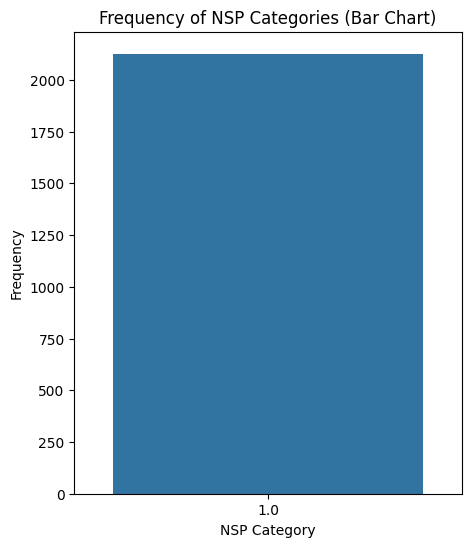

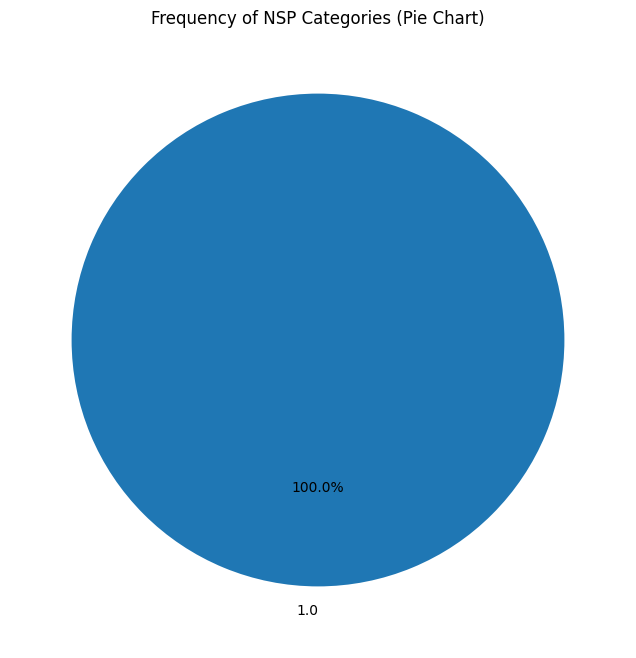

In [38]:
# Bar chart for NSP frequencies
plt.figure(figsize=(5, 6))
sns.countplot(x='NSP', data=df)
plt.title('Frequency of NSP Categories (Bar Chart)')
plt.xlabel('NSP Category')
plt.ylabel('Frequency')
plt.show()

# Pie chart for NSP frequencies
nsp_counts = df['NSP'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(nsp_counts, labels=nsp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Frequency of NSP Categories (Pie Chart)')
plt.show()

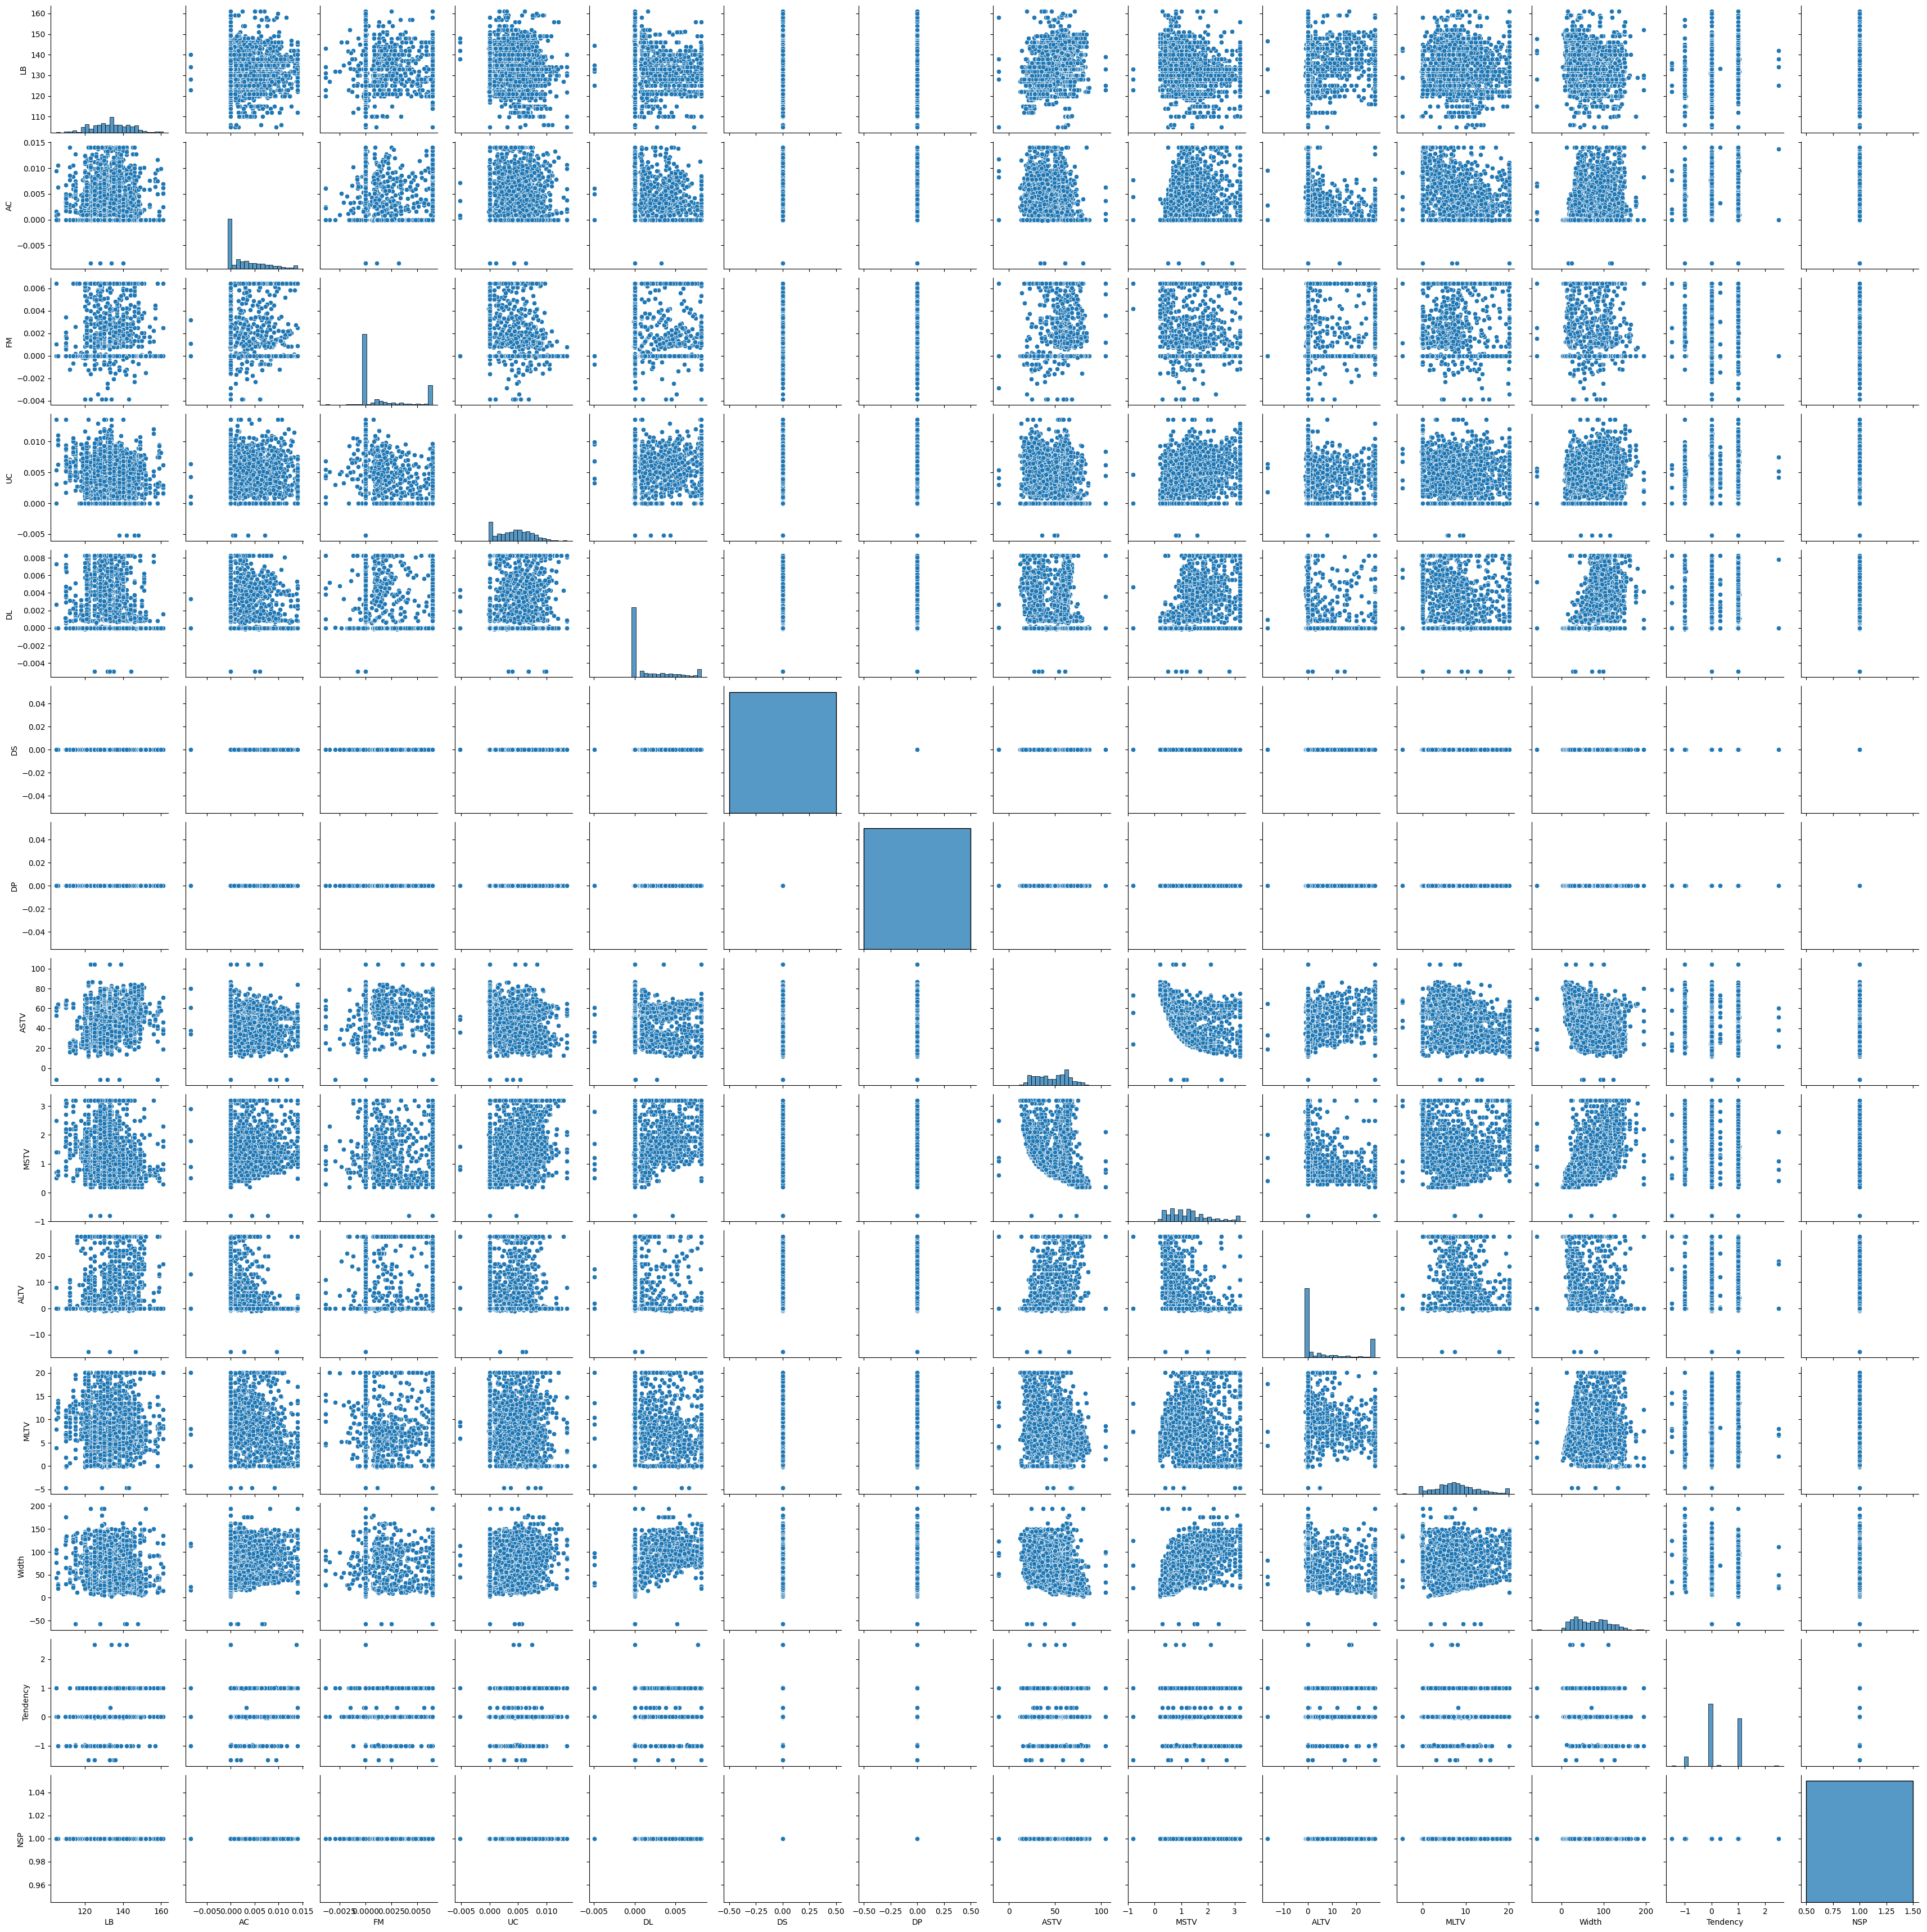

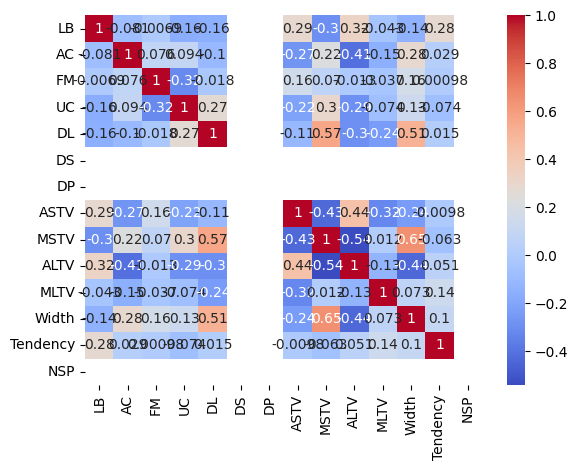

In [39]:
# Analyze relationships between features using scatter plots or pair plots
sns.pairplot(df)
plt.show()

# Create a correlation matrix to examine relationships between numerical features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

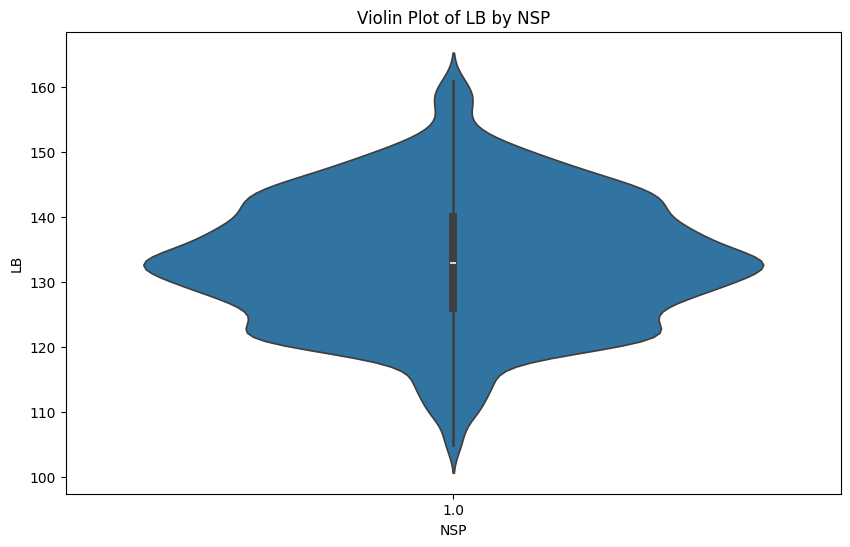

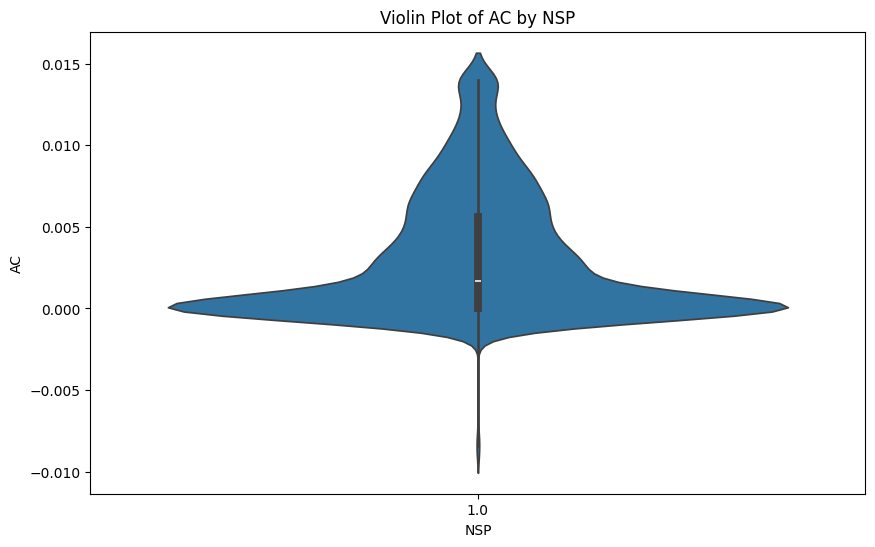

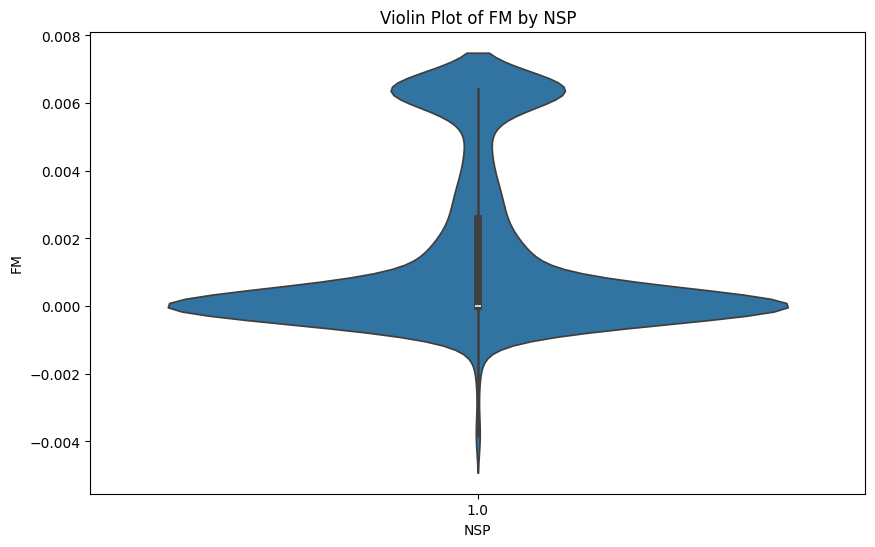

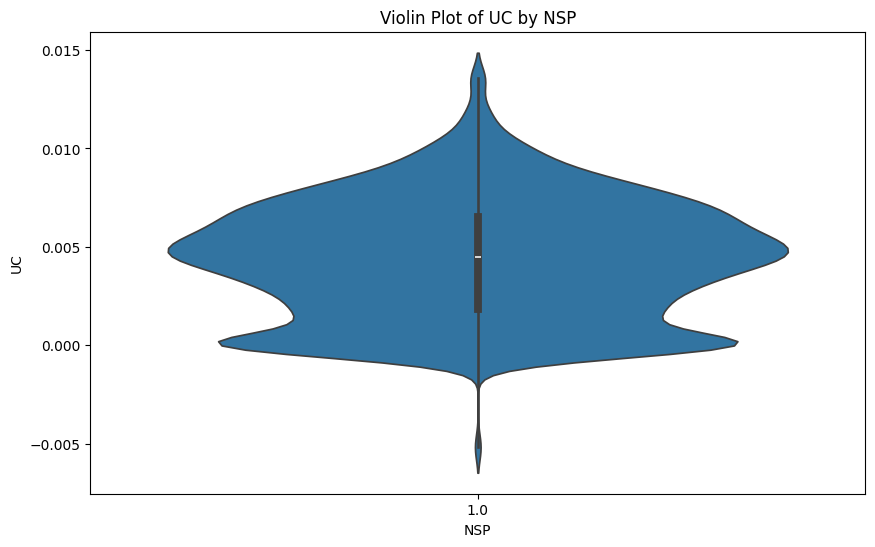

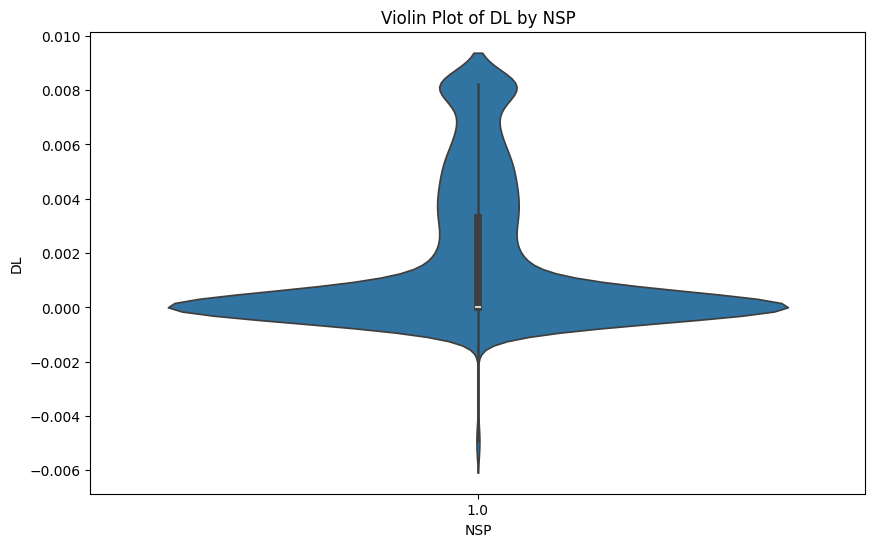

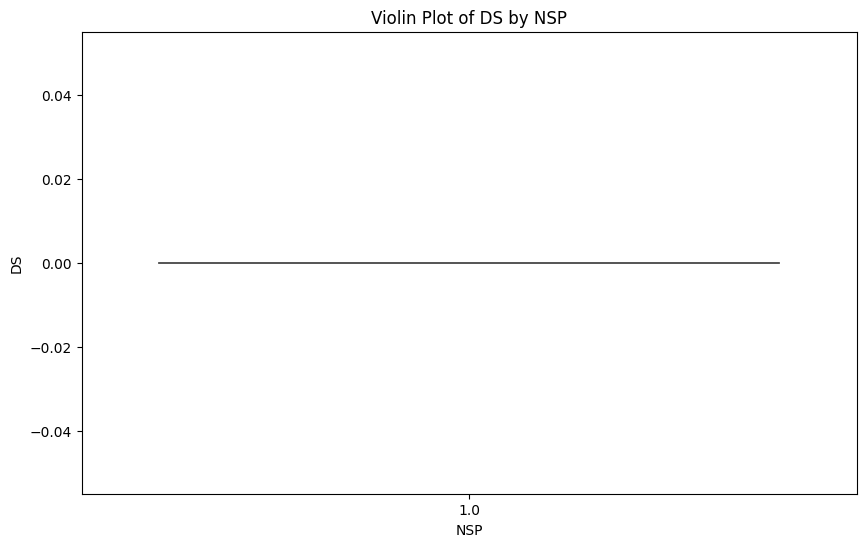

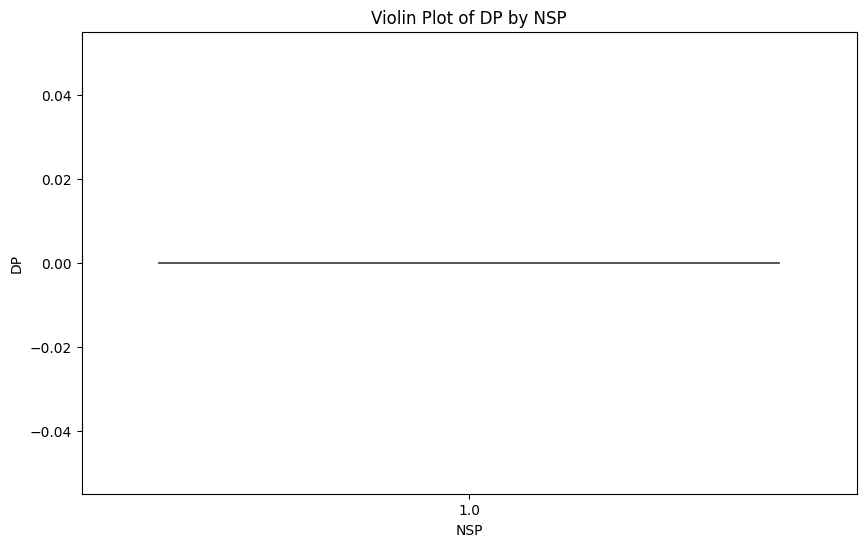

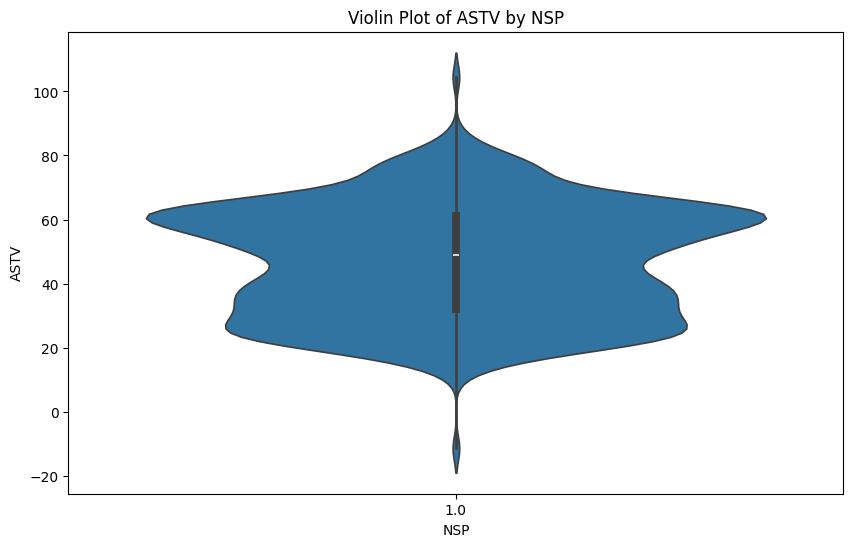

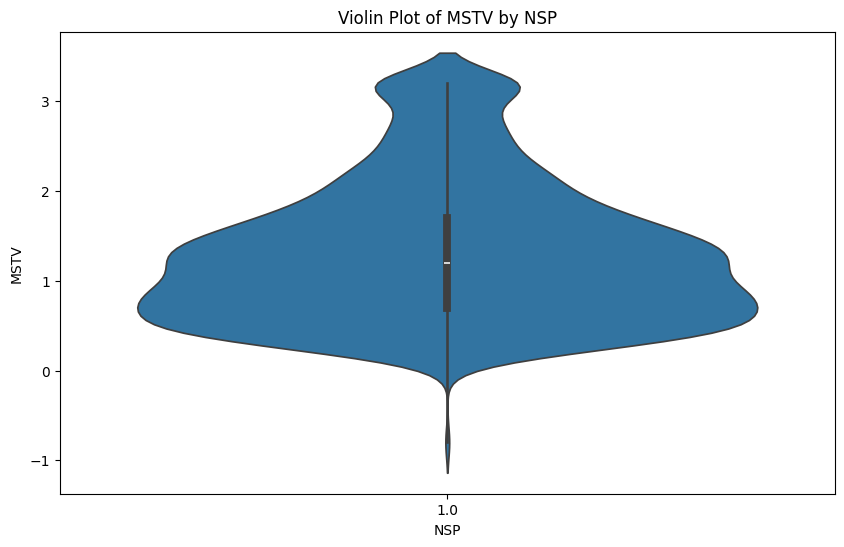

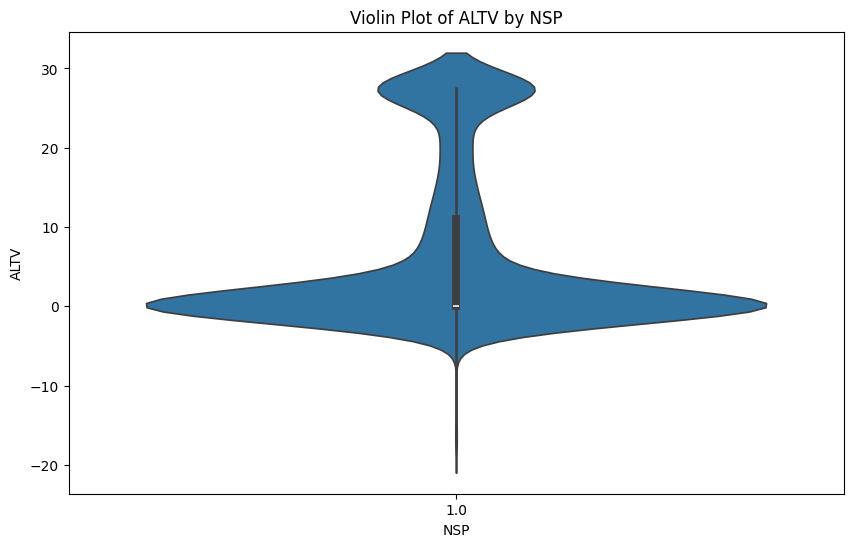

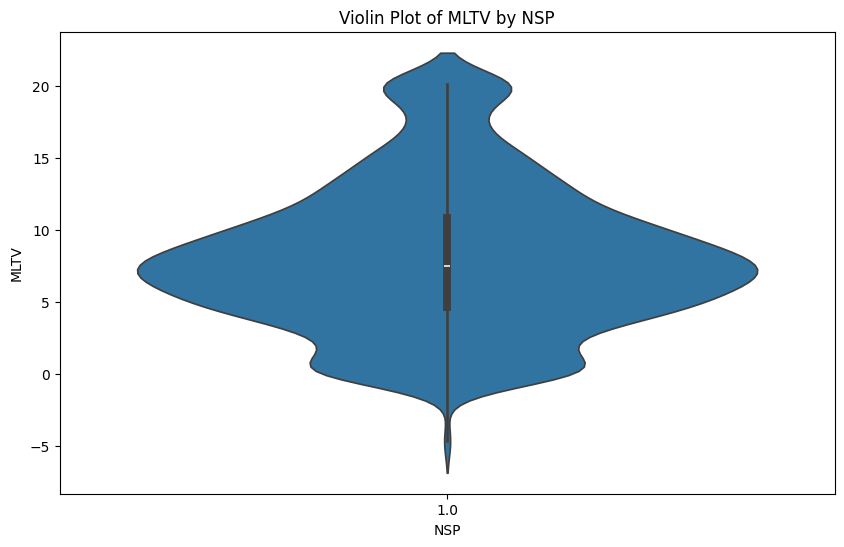

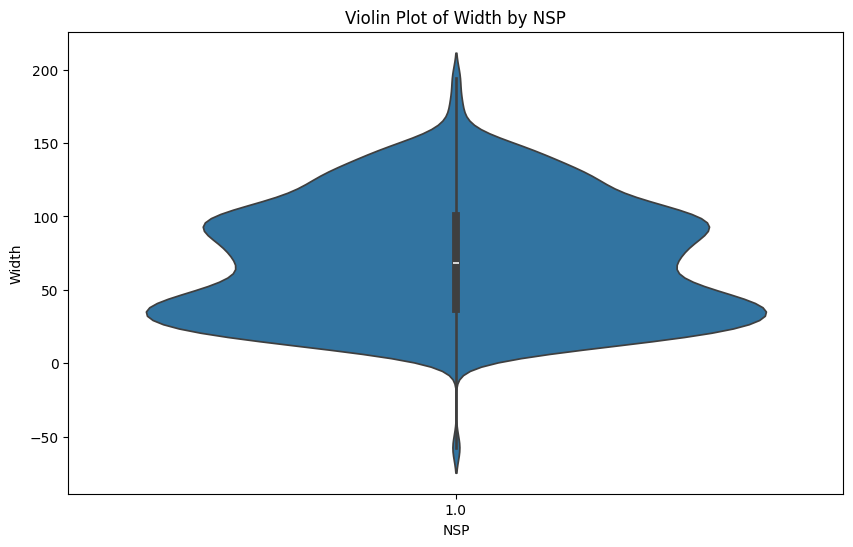

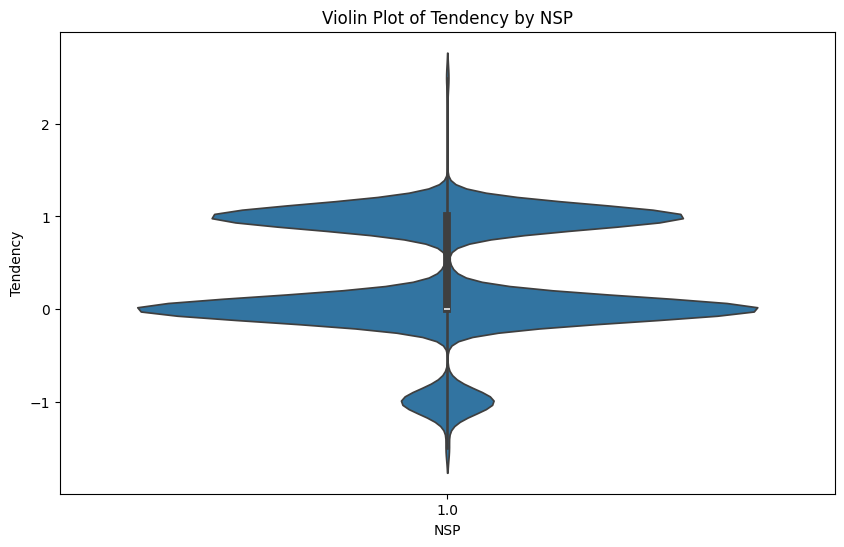

In [40]:
# Create violin plots for numerical features grouped by the target variable ('NSP')
for col in df.select_dtypes(include=np.number):
    if col != 'NSP':  # Exclude the target variable itself
        plt.figure(figsize=(10, 6))  # Adjust figure size as needed
        sns.violinplot(x='NSP', y=col, data=df)
        plt.title(f'Violin Plot of {col} by NSP')
        plt.show()

4.Pattern Recognition and Insights:

<ipython-input-41-6c02bb3c7ee1>:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlation_matrix.shape) #calculate p-values


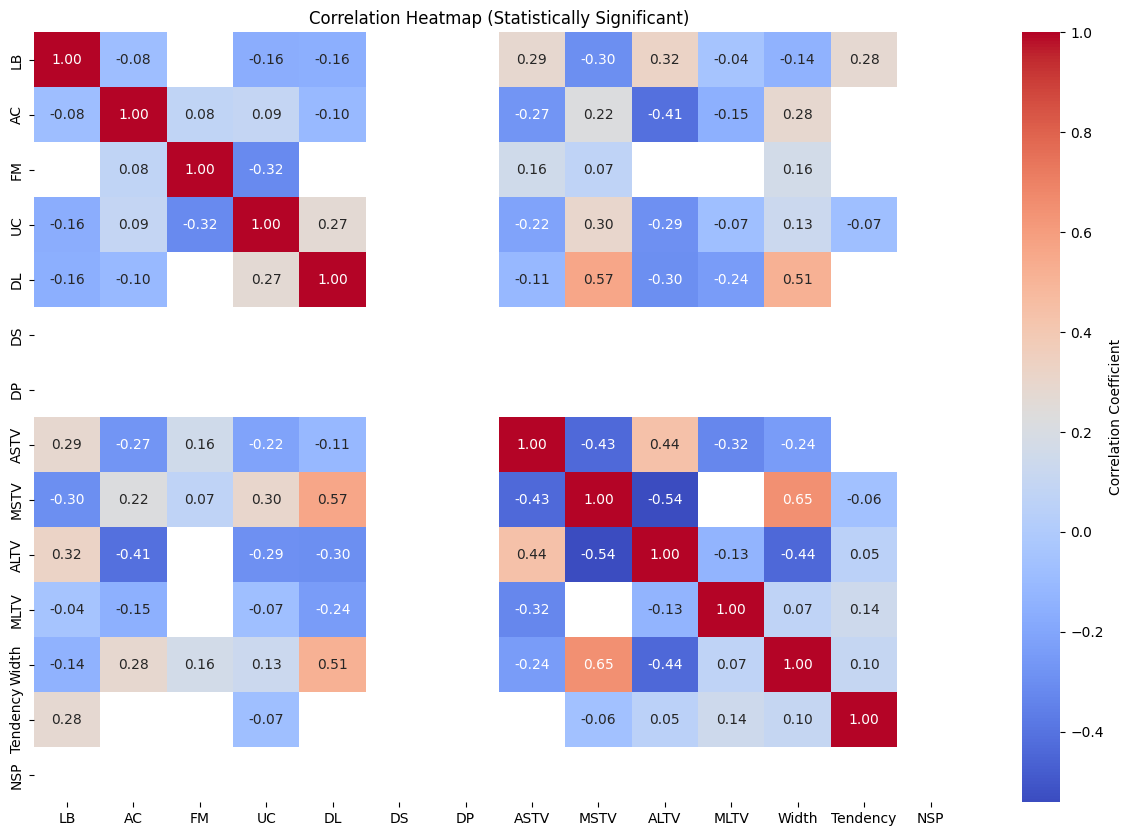

In [41]:
# 1. Correlation Matrix with Significance Testing
from scipy.stats import pearsonr

correlation_matrix = df.corr()
p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlation_matrix.shape) #calculate p-values

# Mask for p-values > 0.05 (not statistically significant)
mask = np.abs(p_values) > 0.05

# Set non-significant correlations to 0 in the correlation matrix
correlation_matrix = correlation_matrix.mask(mask)


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, cbar_kws={'label': 'Correlation Coefficient'}) # Added mask and cbar_kws
plt.title('Correlation Heatmap (Statistically Significant)')
plt.show()



In [42]:
# Discuss Potential Implications
print("\nCorrelation Implications:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Avoid redundant pairs
        if not np.isnan(correlation_matrix.iloc[i, j]):  # Check if the correlation is significant
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]

            print(f"- {col1} and {col2} have a correlation of {correlation:.2f}.")
            if correlation > 0.7:
              print("  - Strong positive correlation:  High values of one variable are associated with high values of the other.")
              print("  - Potential Implication: Consider removing one of the variables to avoid multicollinearity in modeling.")
            elif correlation < -0.7:
              print("  - Strong negative correlation: High values of one variable are associated with low values of the other.")
              print("  - Potential Implication: Investigate the relationship and see if this makes theoretical sense. The directionality might be important for interpretation.")
            else:
              print("  - Moderate correlation: Further investigation needed to understand the nature and extent of this relationship")



Correlation Implications:
- AC and LB have a correlation of -0.08.
  - Moderate correlation: Further investigation needed to understand the nature and extent of this relationship
- FM and AC have a correlation of 0.08.
  - Moderate correlation: Further investigation needed to understand the nature and extent of this relationship
- UC and LB have a correlation of -0.16.
  - Moderate correlation: Further investigation needed to understand the nature and extent of this relationship
- UC and AC have a correlation of 0.09.
  - Moderate correlation: Further investigation needed to understand the nature and extent of this relationship
- UC and FM have a correlation of -0.32.
  - Moderate correlation: Further investigation needed to understand the nature and extent of this relationship
- DL and LB have a correlation of -0.16.
  - Moderate correlation: Further investigation needed to understand the nature and extent of this relationship
- DL and AC have a correlation of -0.10.
  - Moderate cor

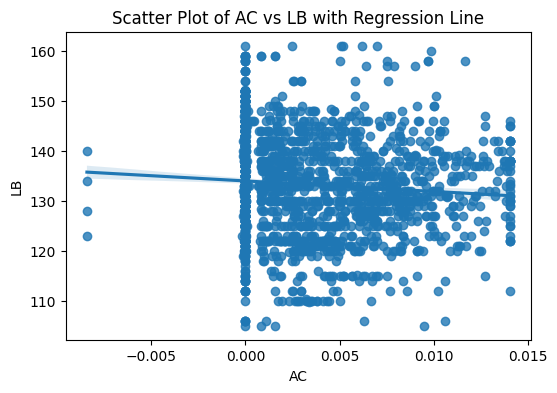

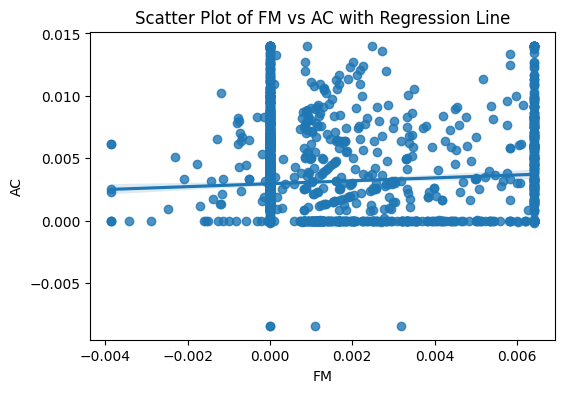

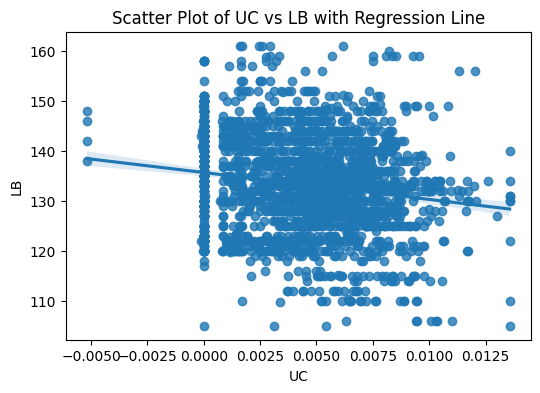

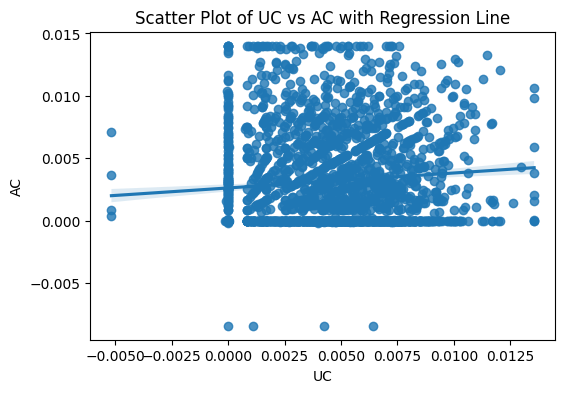

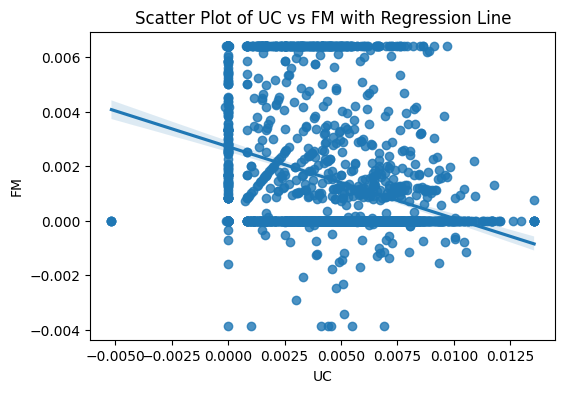

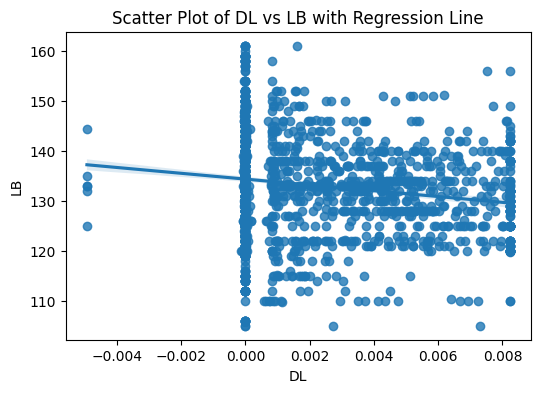

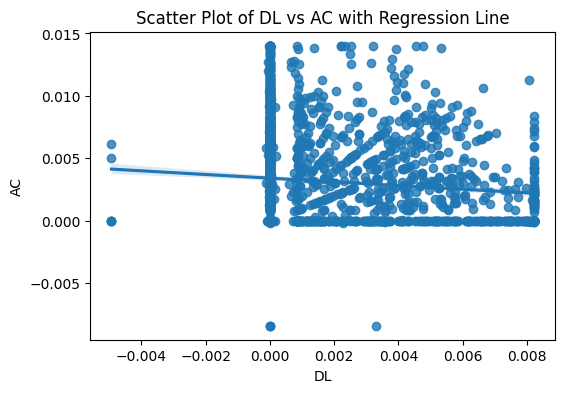

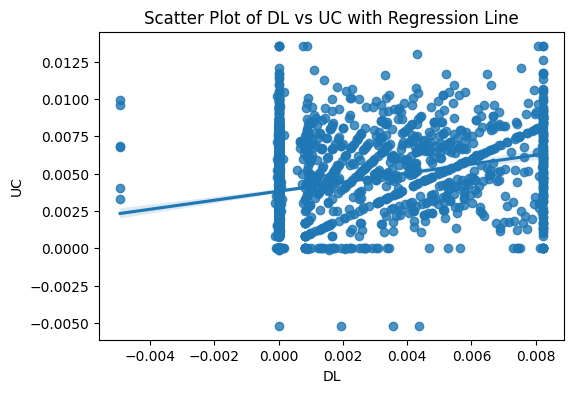

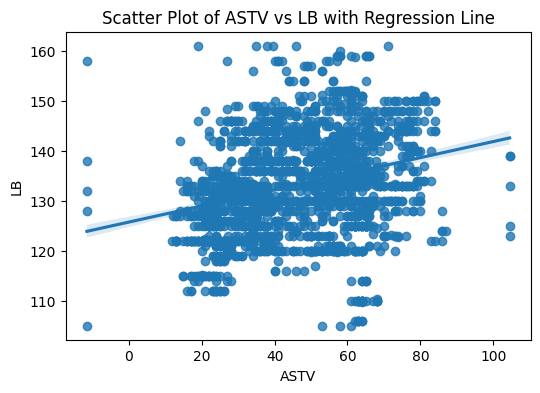

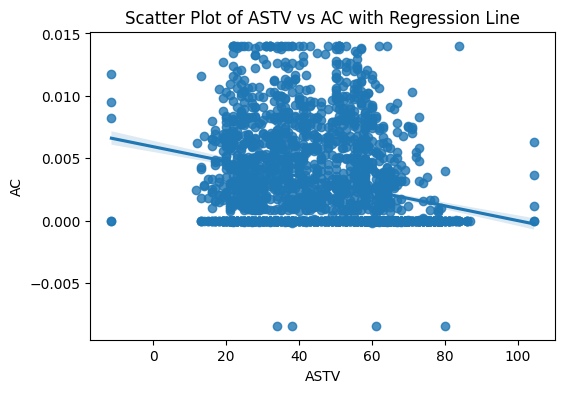

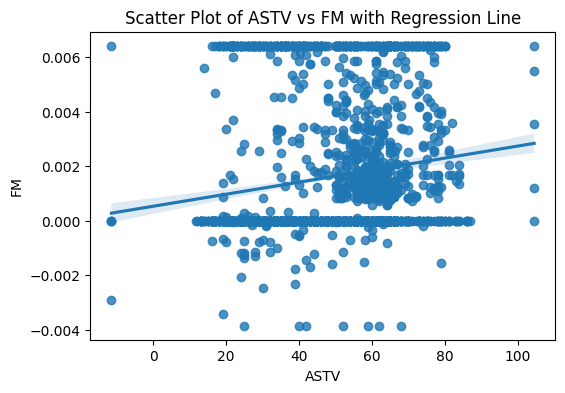

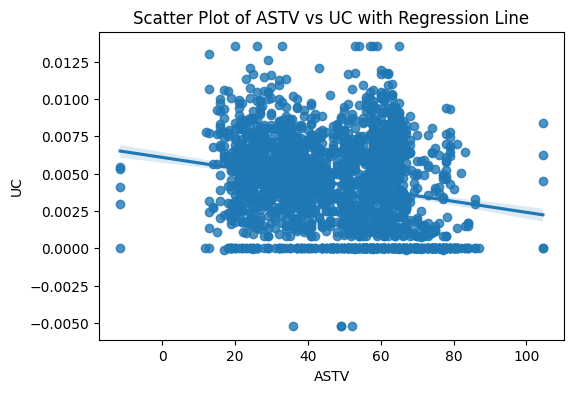

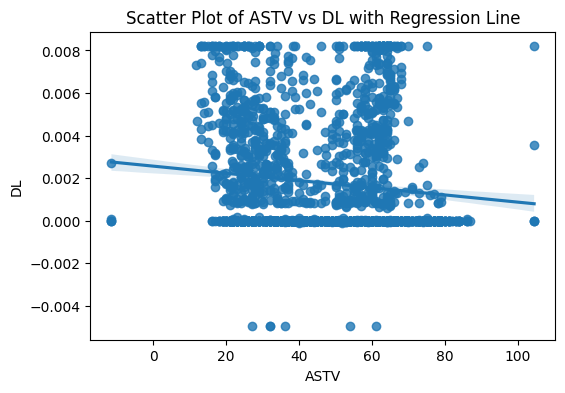

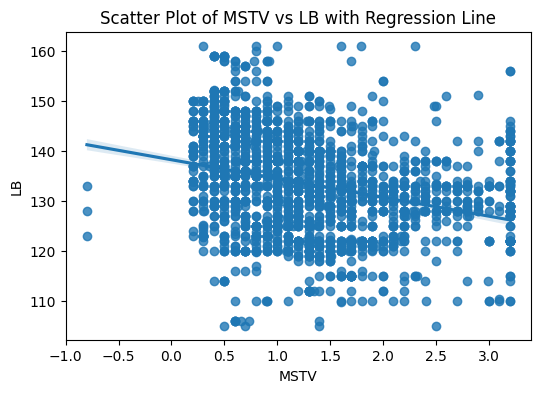

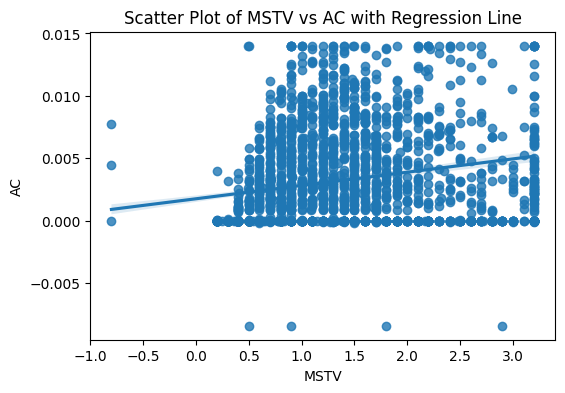

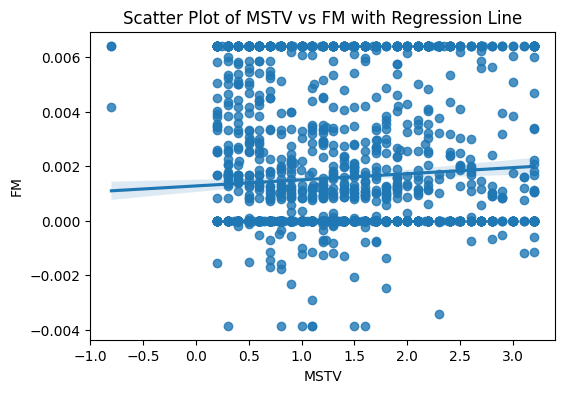

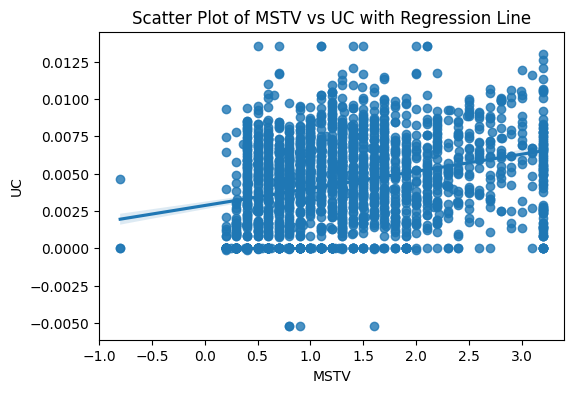

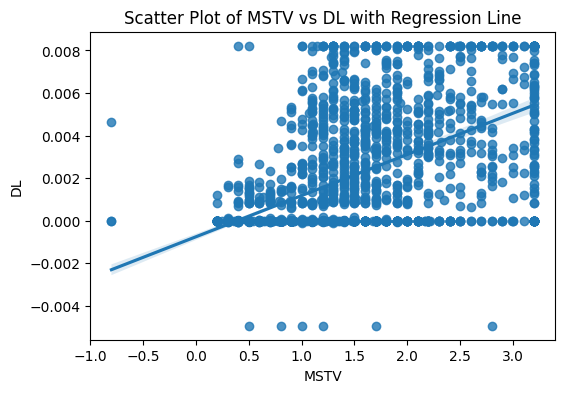

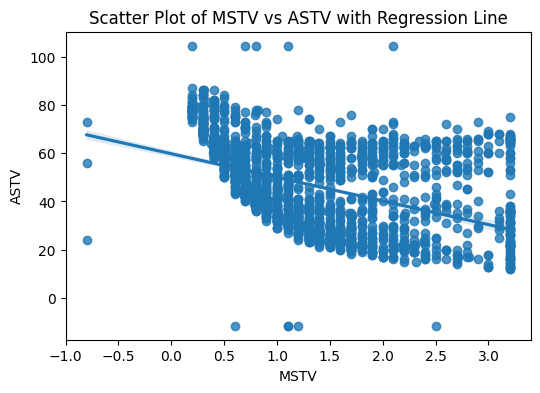

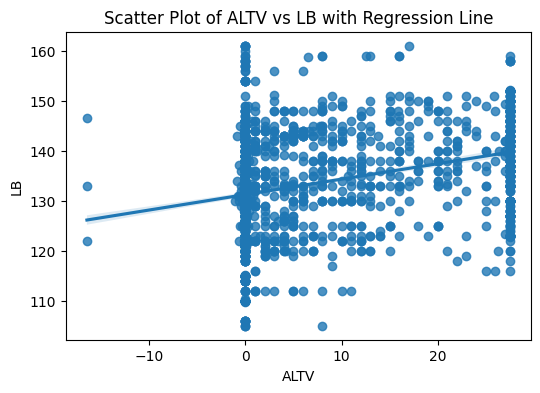

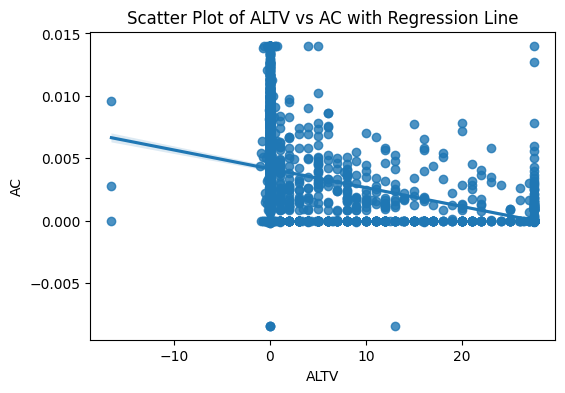

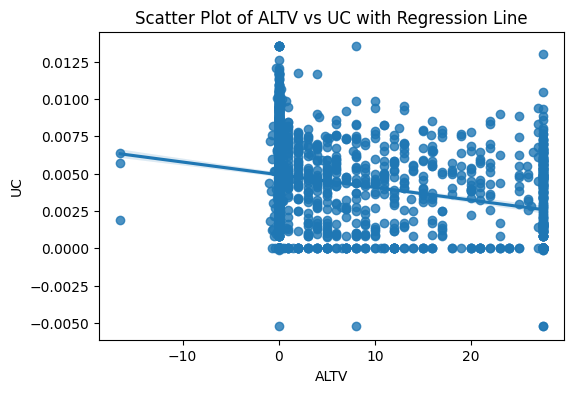

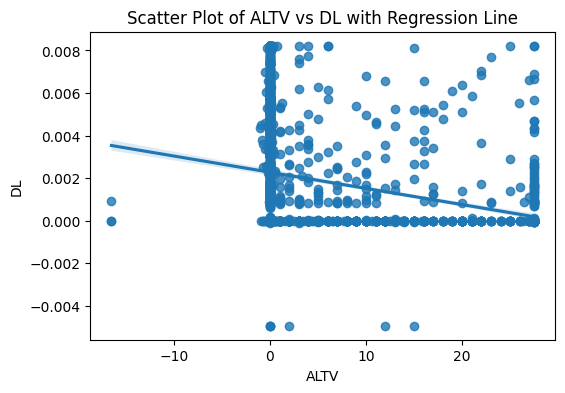

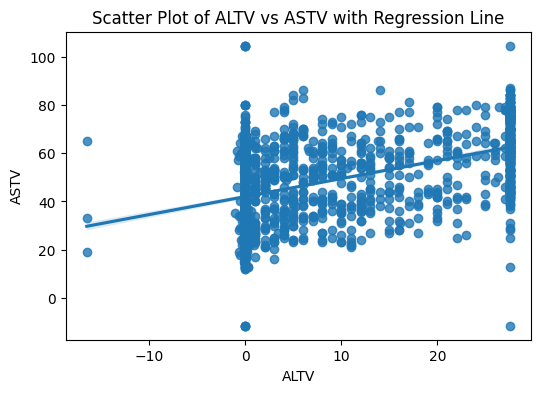

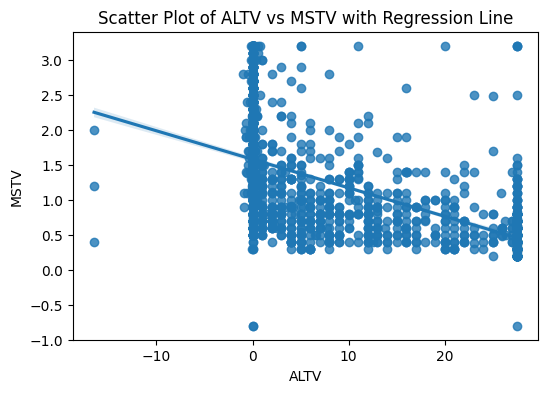

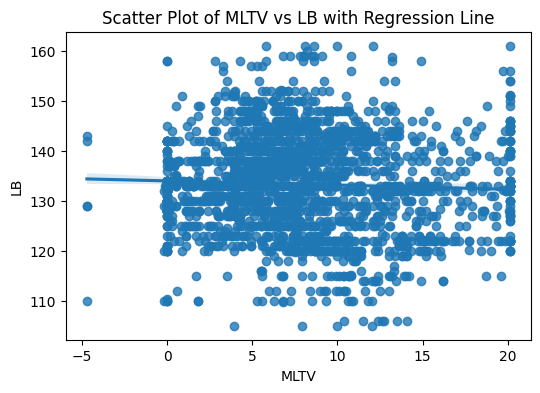

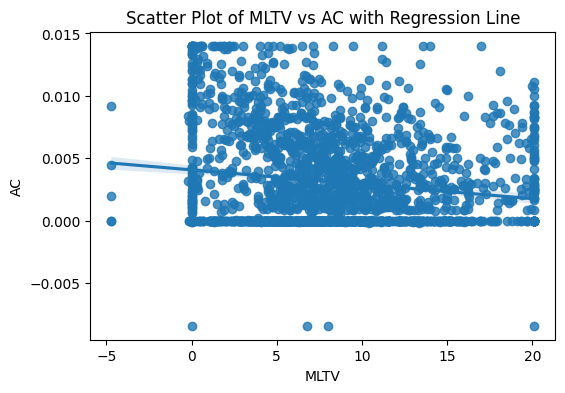

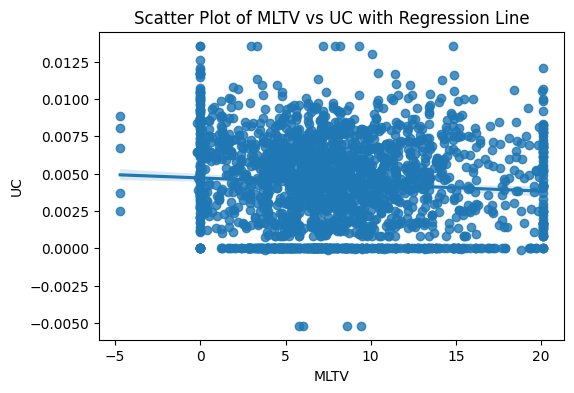

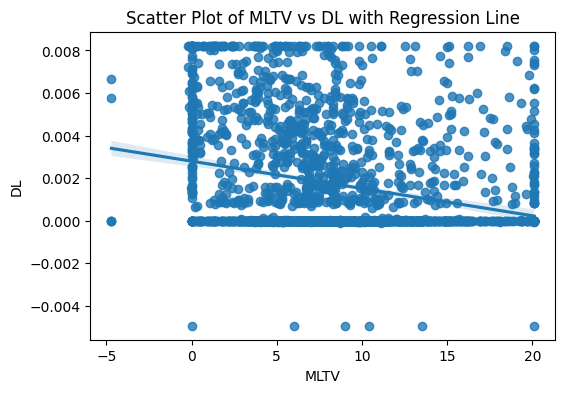

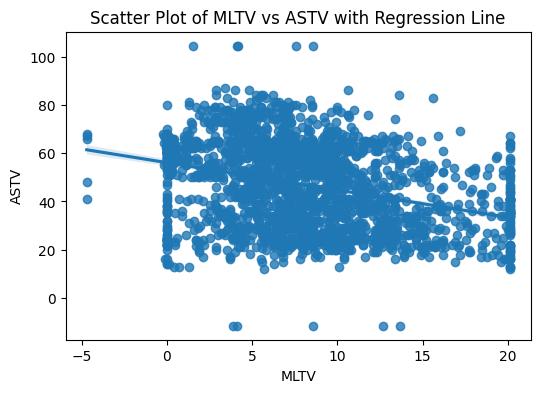

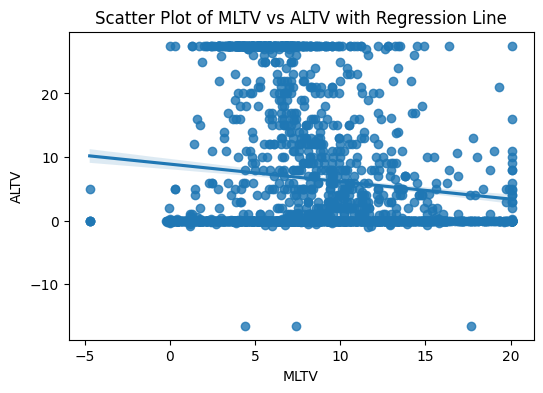

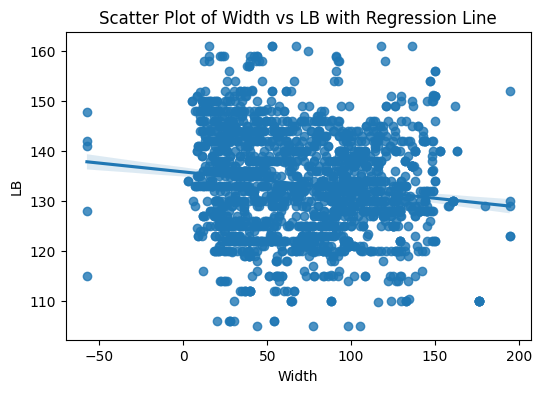

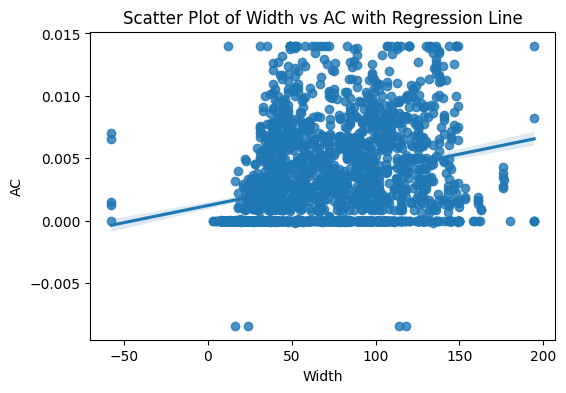

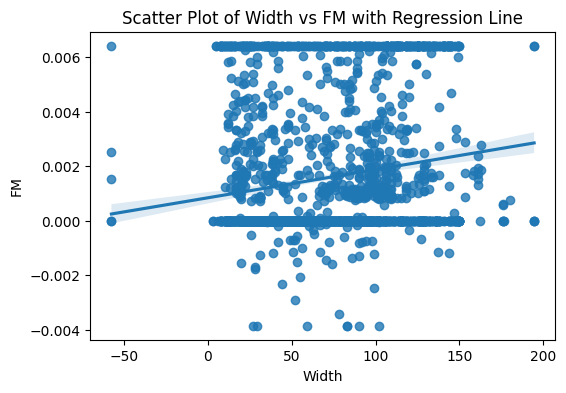

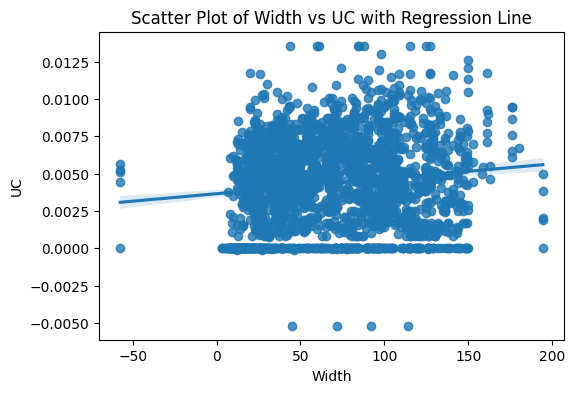

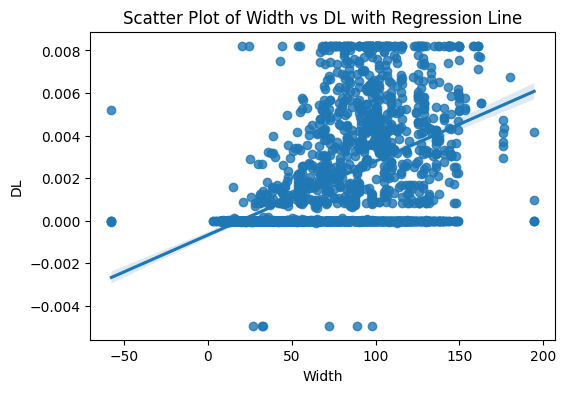

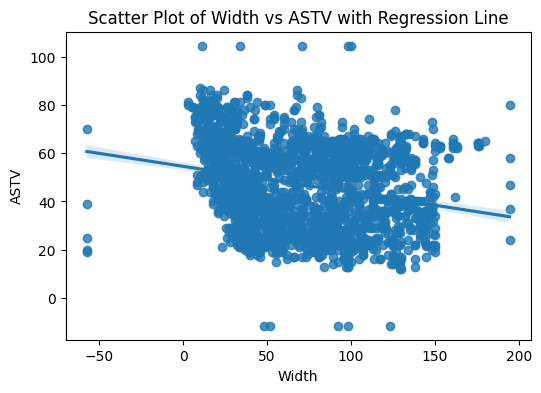

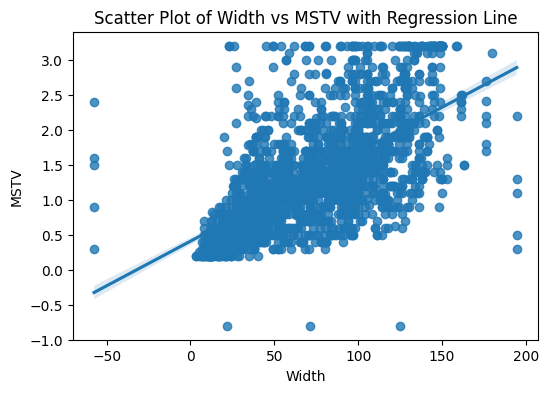

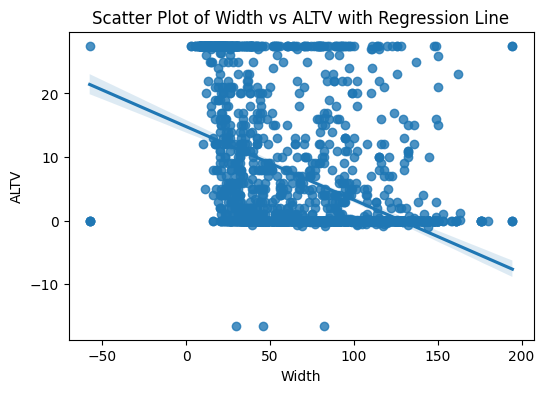

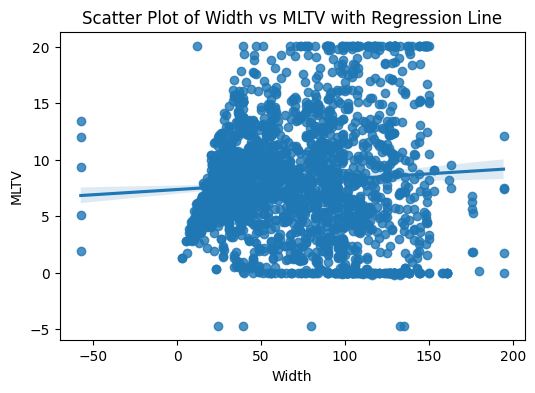

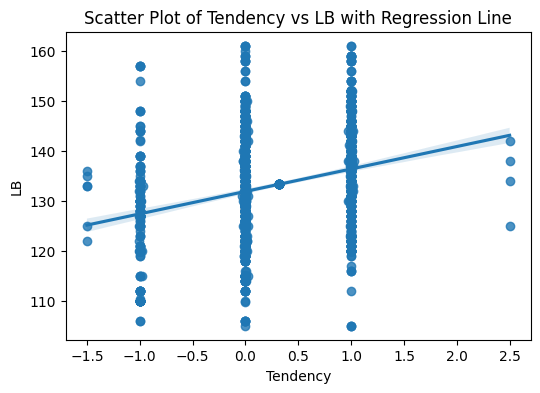

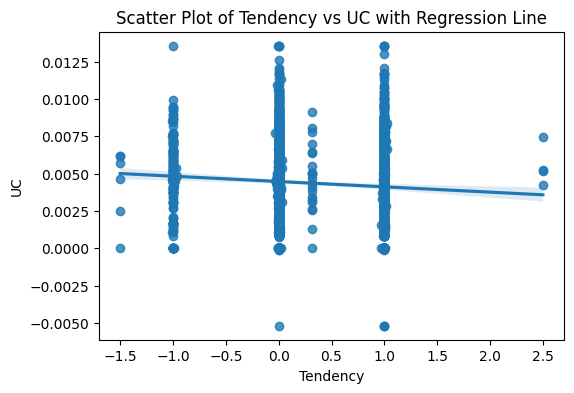

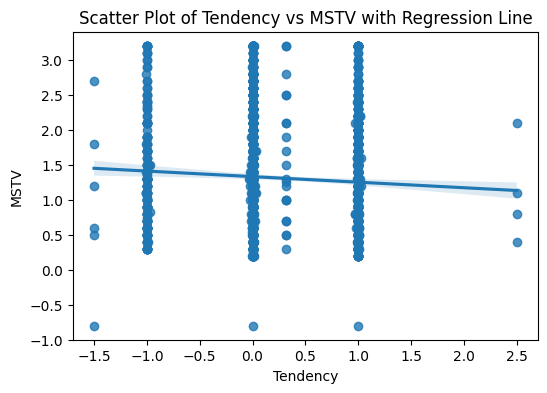

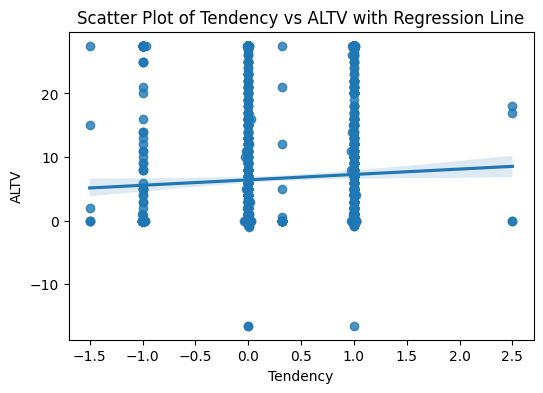

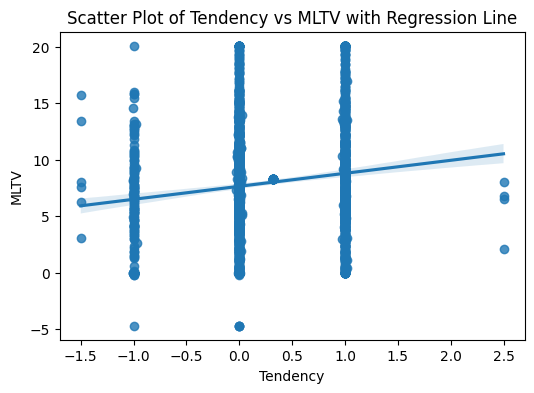

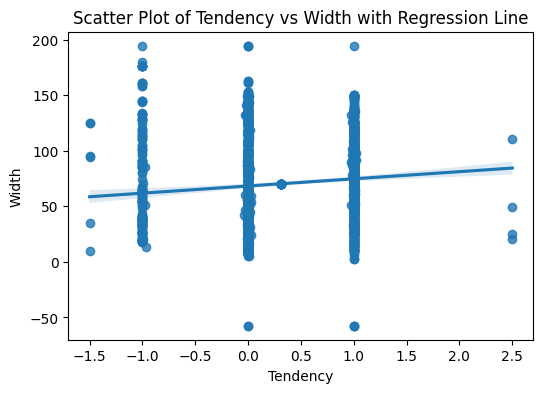

In [43]:
# 2.  Scatter Plots with Regression Lines
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if not np.isnan(correlation_matrix.iloc[i, j]):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        plt.figure(figsize=(6, 4))
        sns.regplot(x=col1, y=col2, data=df)
        plt.title(f'Scatter Plot of {col1} vs {col2} with Regression Line')
        plt.show()

In [44]:
# Check if a suitable time-based column exists (e.g., 'Time')
time_column = None
for col in df.columns:
    if col.lower() in ['time', 'date']:  # Check for potential time-related columns
        time_column = col
        break

if time_column is not None:
    # 1. Convert the time-based column to datetime objects if it's not already:
    if not pd.api.types.is_datetime64_any_dtype(df[time_column]):
        df[time_column] = pd.to_datetime(df[time_column])

    # 2. Set the time-based column as the index:
    df = df.set_index(time_column)

    # 3. Resample the data if needed (example: resample to monthly frequency)
    # monthly_data = df['Value'].resample('M').mean()  # Replace 'Value' with the relevant column

    # 4. Plot the trend over time:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['MSTV'])  # Replace 'MSTV' with the relevant column
    plt.xlabel(time_column)
    plt.ylabel('MSTV')  # Replace 'MSTV' with the relevant column
    plt.title(f'Trend of MSTV over {time_column}')  # Replace 'MSTV' with the relevant column
    plt.grid(True)
    plt.show()
else:
    print("No suitable time-based column found in the DataFrame. Trend analysis cannot be performed.")

No suitable time-based column found in the DataFrame. Trend analysis cannot be performed.
